Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import matplotlib

from brokenaxes import brokenaxes

# Formatting

Matplotlib parameters

In [3]:
plt.rcParams.update({
    # Fonts - Times, 8-12 pt
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times"],
    "font.size": 12,                  # Base size 8-12 pt
    # Axes
    "axes.titlesize": 12,             # Axis title size
    "axes.labelsize": 12,             # Axis label size
    "axes.labelweight": "normal",     # Normal weight
    "axes.titleweight": "normal",     # Normal weight for titles
    # Ticks
    "xtick.labelsize": 9,             # X tick label size (8-12)
    "ytick.labelsize": 9,             # Y tick label size (8-12)
    "xtick.direction": "in",          # Tick direction
    "ytick.direction": "in",          # Tick direction
    # Legends
    "legend.fontsize": 12,            # Legend text size (8-12)
    "legend.title_fontsize": 12,      # Legend title size (8-12)
    "legend.loc": 'best',             # Automatic location
    # Resolution
    "figure.dpi": 500,                # Display DPI
    "savefig.dpi": 500,               # Save DPI (300-600)
    "savefig.bbox": "tight",          # Crop whitespace
    # Without LaTeX
    "text.usetex": False,             # PLOS does not accept LaTeX EPS
    "mathtext.fontset": "dejavuserif",# Match math fonts to serif
})

Colors

In [4]:
## Reusable color utility
# I use this one
import numpy as np
import matplotlib.pyplot as plt

def make_color_map(values, cmap, vmin=0.25, vmax=1.0):
    '''
    Function that takes array of values and make a colormap for them
    '''
    values_sorted = sorted(values)
    colors = cmap(np.linspace(vmin, vmax, len(values)))
    return dict(zip(values_sorted, colors))

# To be given value
v_rest = [-22, -17, -12.3, -8.5]
pqif_vector = [0, 0.25, 0.5, 0.75, 1]

# Make colors once
color_map_vrest = make_color_map(v_rest, plt.cm.Reds)  # Reds for vrest
color_map_pqif = make_color_map(pqif_vector[1:-1], plt.cm.Greens)  # Greens for pqif

# Explicit endpoints for pqif
color_map_pqif[pqif_vector[0]] = 'black'
color_map_pqif[pqif_vector[-1]] = 'steelblue'


# Store values for plotting
Here I take out all the data I am interested in from the file system, and store it in a dedicated dataframe and dictionary. I make a dataframe with all values associated with a connectivity matrix and an ID, and a dictionary mapping ID to an array storing the weights (flattened). I do this so that I can loop through and plot everything from it in one go.

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########

vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
seed_number = [i for i in range(0, 2)] 


########## Dataframe and dictionary ##########

rows = []  # Container for rows of dataframe
weights_dict = {}  # Dictionary for weight arrays

for dyn in dynamics:

    # Simulation number corresponding to dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for sim, vr, f in zip(simulation_number, vrest, slope):
        for pqif in pqif_number:
            for seed in seed_number:
                # Loop through simulations of pqif across seeds


                dataframe_title = f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}' # load dataframe

                simulation_id = f'{dyn}_{sim}_{pqif}_{seed}'  # Shared across dataframe and dictionary

                try:  # Notify if something did not exist
                    weights_df = pd.read_csv(dataframe_title, header=None).values
                except FileNotFoundError:
                    print(f"File not found: {dataframe_title}, will be skipped.")
                    continue  # Go to next iteration


                # Flatten to 1D array
                weights = weights_df.flatten()

                # Standard deviation and mean of weights for current seed of vrest/slope and pqif
                sd = np.std(weights)
                mean = np.mean(weights)

                if pqif == 1:
                    vr = None
                    f = slope_qif


                row = [simulation_id, dyn, sim, vr, f, pqif, seed, sd, mean]  # Store all data associated with the connectivity matrix + a simulationID to the weights in dictionary
                rows.append(row)  # Append row to what becomes the dataframe later

                weights_dict[simulation_id] = weights  # Dictionary mapping simulationID to weight array


########## Make dataframe ##########

columns = ['simulationID', 'dynamic', 'simulation', 'vrest', 'slope', 'pqif', 'seed', 'std', 'mean']
df = pd.DataFrame(rows, columns=columns)


########## Make a copy of dataframe for further use ##########

wDF = df.copy()

########## Print statements to control ##########
print(wDF.head())
print(wDF.tail())
print(weights_dict)
# for i in weights_dict.items():
#     print(i)

File not found: sequences\simulation_9\simulation_9_connectivity_matrix\simulation_9_connectivity_pqif_0_iloop_11_seed_1, will be skipped.
File not found: sequences\simulation_9\simulation_9_connectivity_matrix\simulation_9_connectivity_pqif_0.25_iloop_11_seed_1, will be skipped.
File not found: sequences\simulation_9\simulation_9_connectivity_matrix\simulation_9_connectivity_pqif_0.5_iloop_11_seed_1, will be skipped.
File not found: sequences\simulation_9\simulation_9_connectivity_matrix\simulation_9_connectivity_pqif_0.75_iloop_11_seed_1, will be skipped.
File not found: sequences\simulation_9\simulation_9_connectivity_matrix\simulation_9_connectivity_pqif_1_iloop_11_seed_1, will be skipped.
File not found: sequences\simulation_10\simulation_10_connectivity_matrix\simulation_10_connectivity_pqif_0_iloop_11_seed_1, will be skipped.
File not found: sequences\simulation_10\simulation_10_connectivity_matrix\simulation_10_connectivity_pqif_0.25_iloop_11_seed_1, will be skipped.
File not f

In [6]:
print(wDF.tail(25))

             simulationID       dynamic  simulation  vrest  slope  pqif  seed  \
35   oscillations_4_0.5_1  oscillations           4  -22.0   7.18  0.50     1   
36  oscillations_4_0.75_0  oscillations           4  -22.0   7.18  0.75     0   
37  oscillations_4_0.75_1  oscillations           4  -22.0   7.18  0.75     1   
38     oscillations_4_1_0  oscillations           4    NaN  10.74  1.00     0   
39     oscillations_4_1_1  oscillations           4    NaN  10.74  1.00     1   
40        sequences_9_0_0     sequences           9   -8.5  14.44  0.00     0   
41     sequences_9_0.25_0     sequences           9   -8.5  14.44  0.25     0   
42      sequences_9_0.5_0     sequences           9   -8.5  14.44  0.50     0   
43     sequences_9_0.75_0     sequences           9   -8.5  14.44  0.75     0   
44        sequences_9_1_0     sequences           9    NaN  10.74  1.00     0   
45       sequences_10_0_0     sequences          10  -12.3  10.68  0.00     0   
46    sequences_10_0.25_0   

# Figures

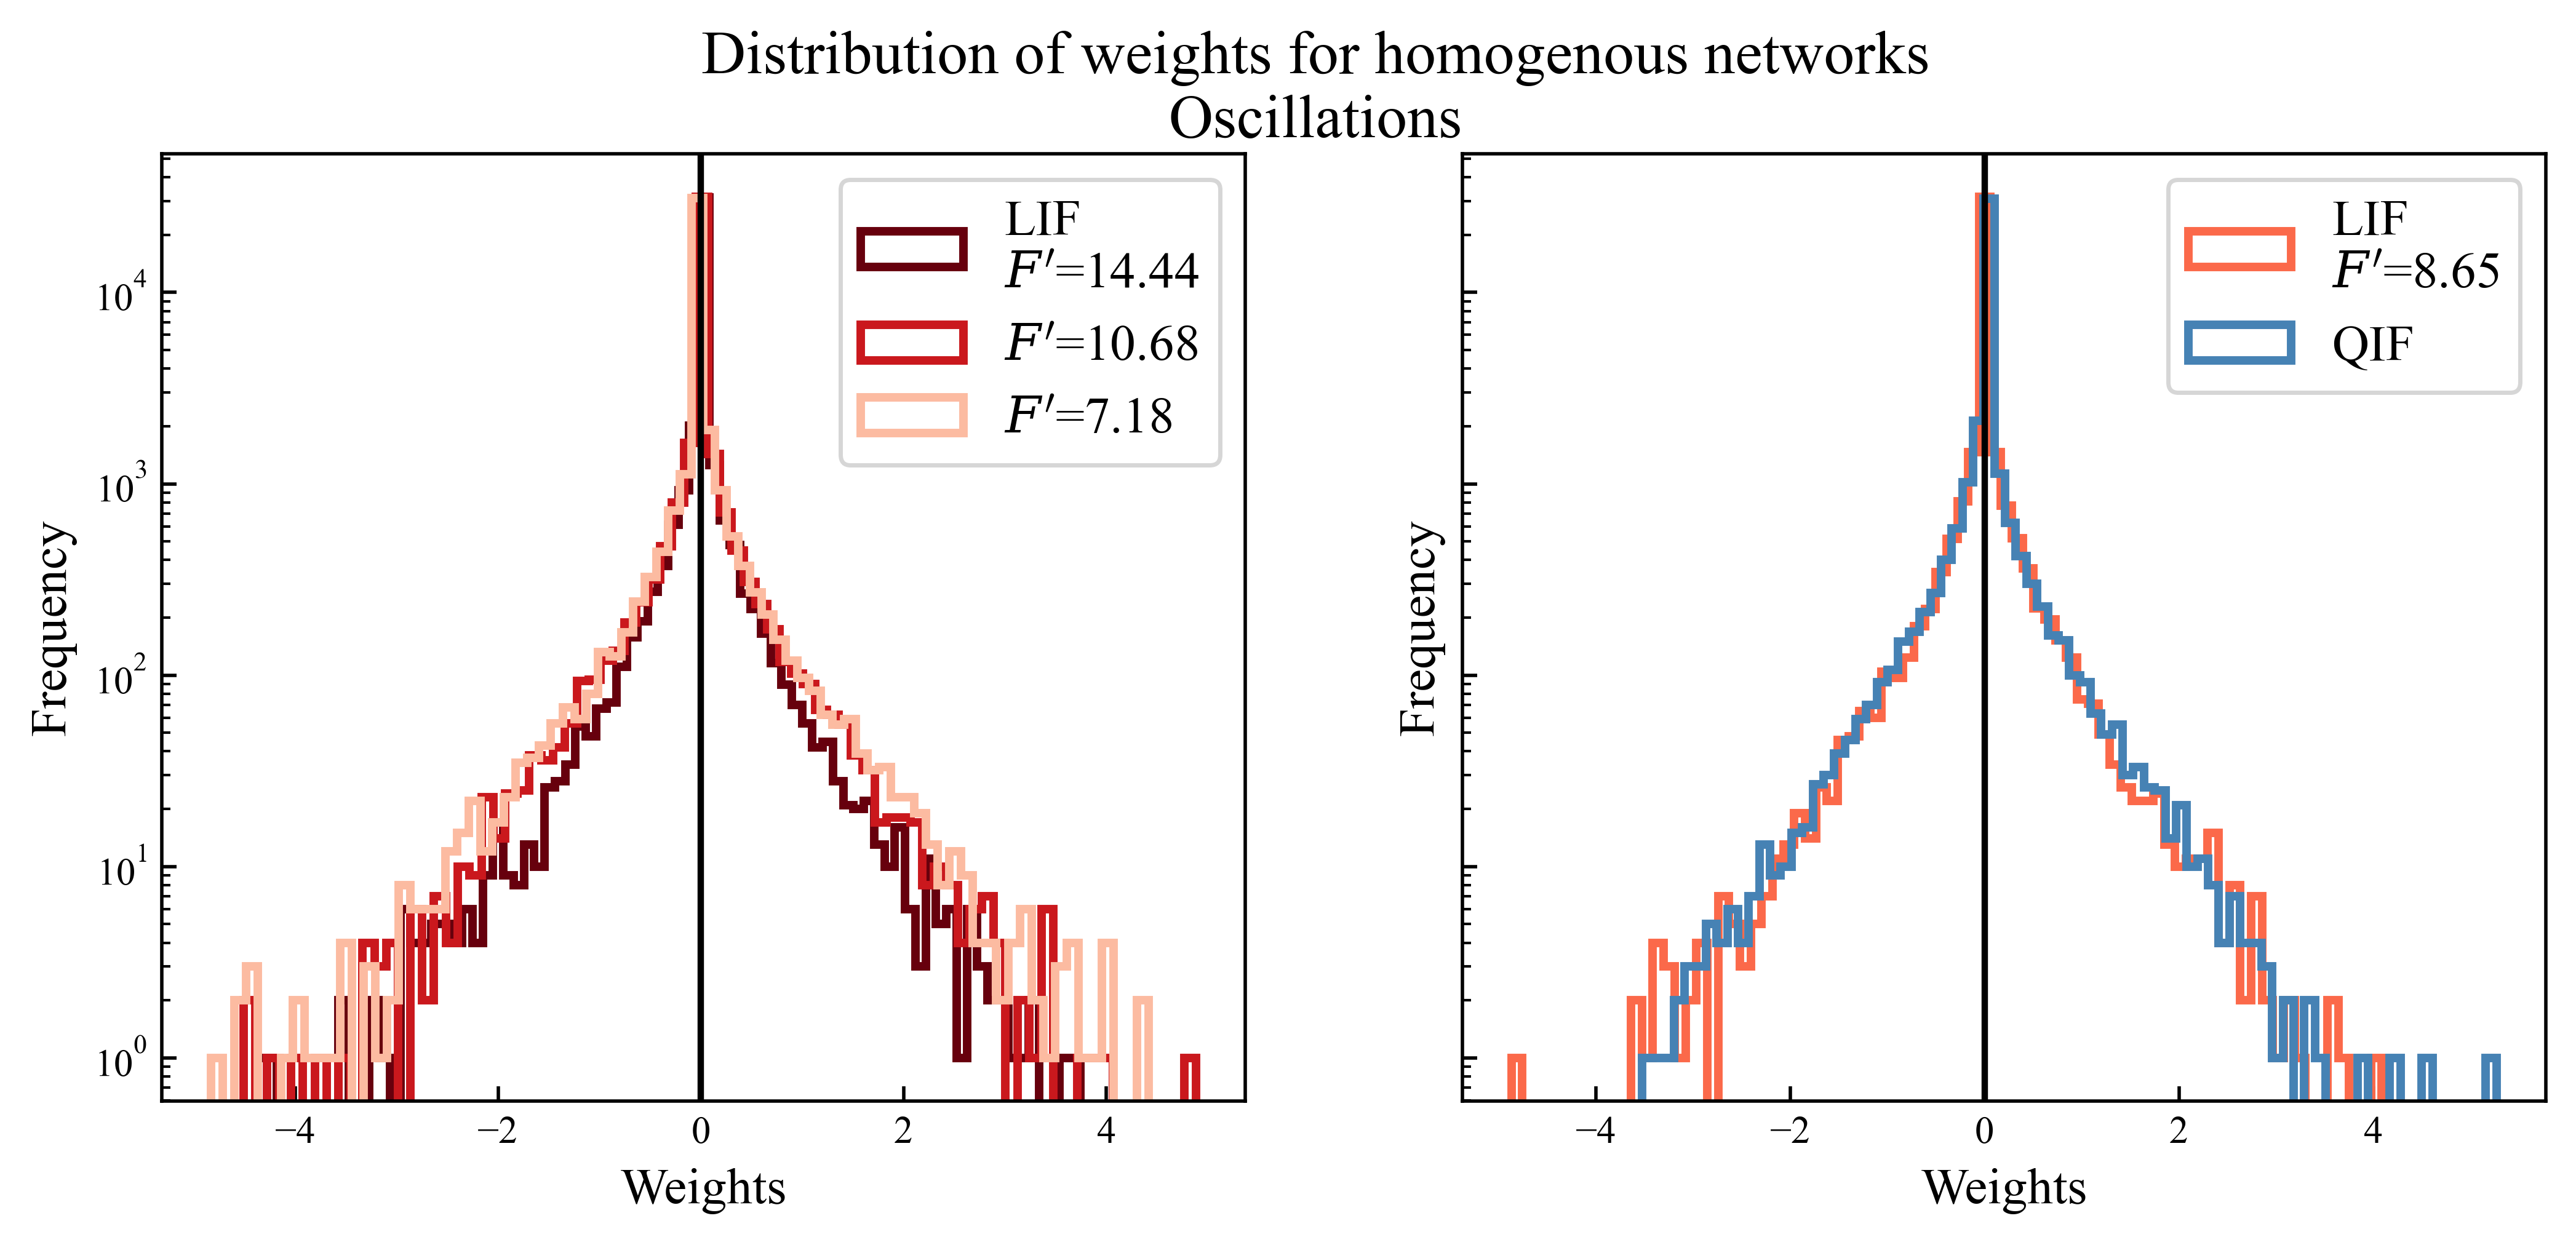

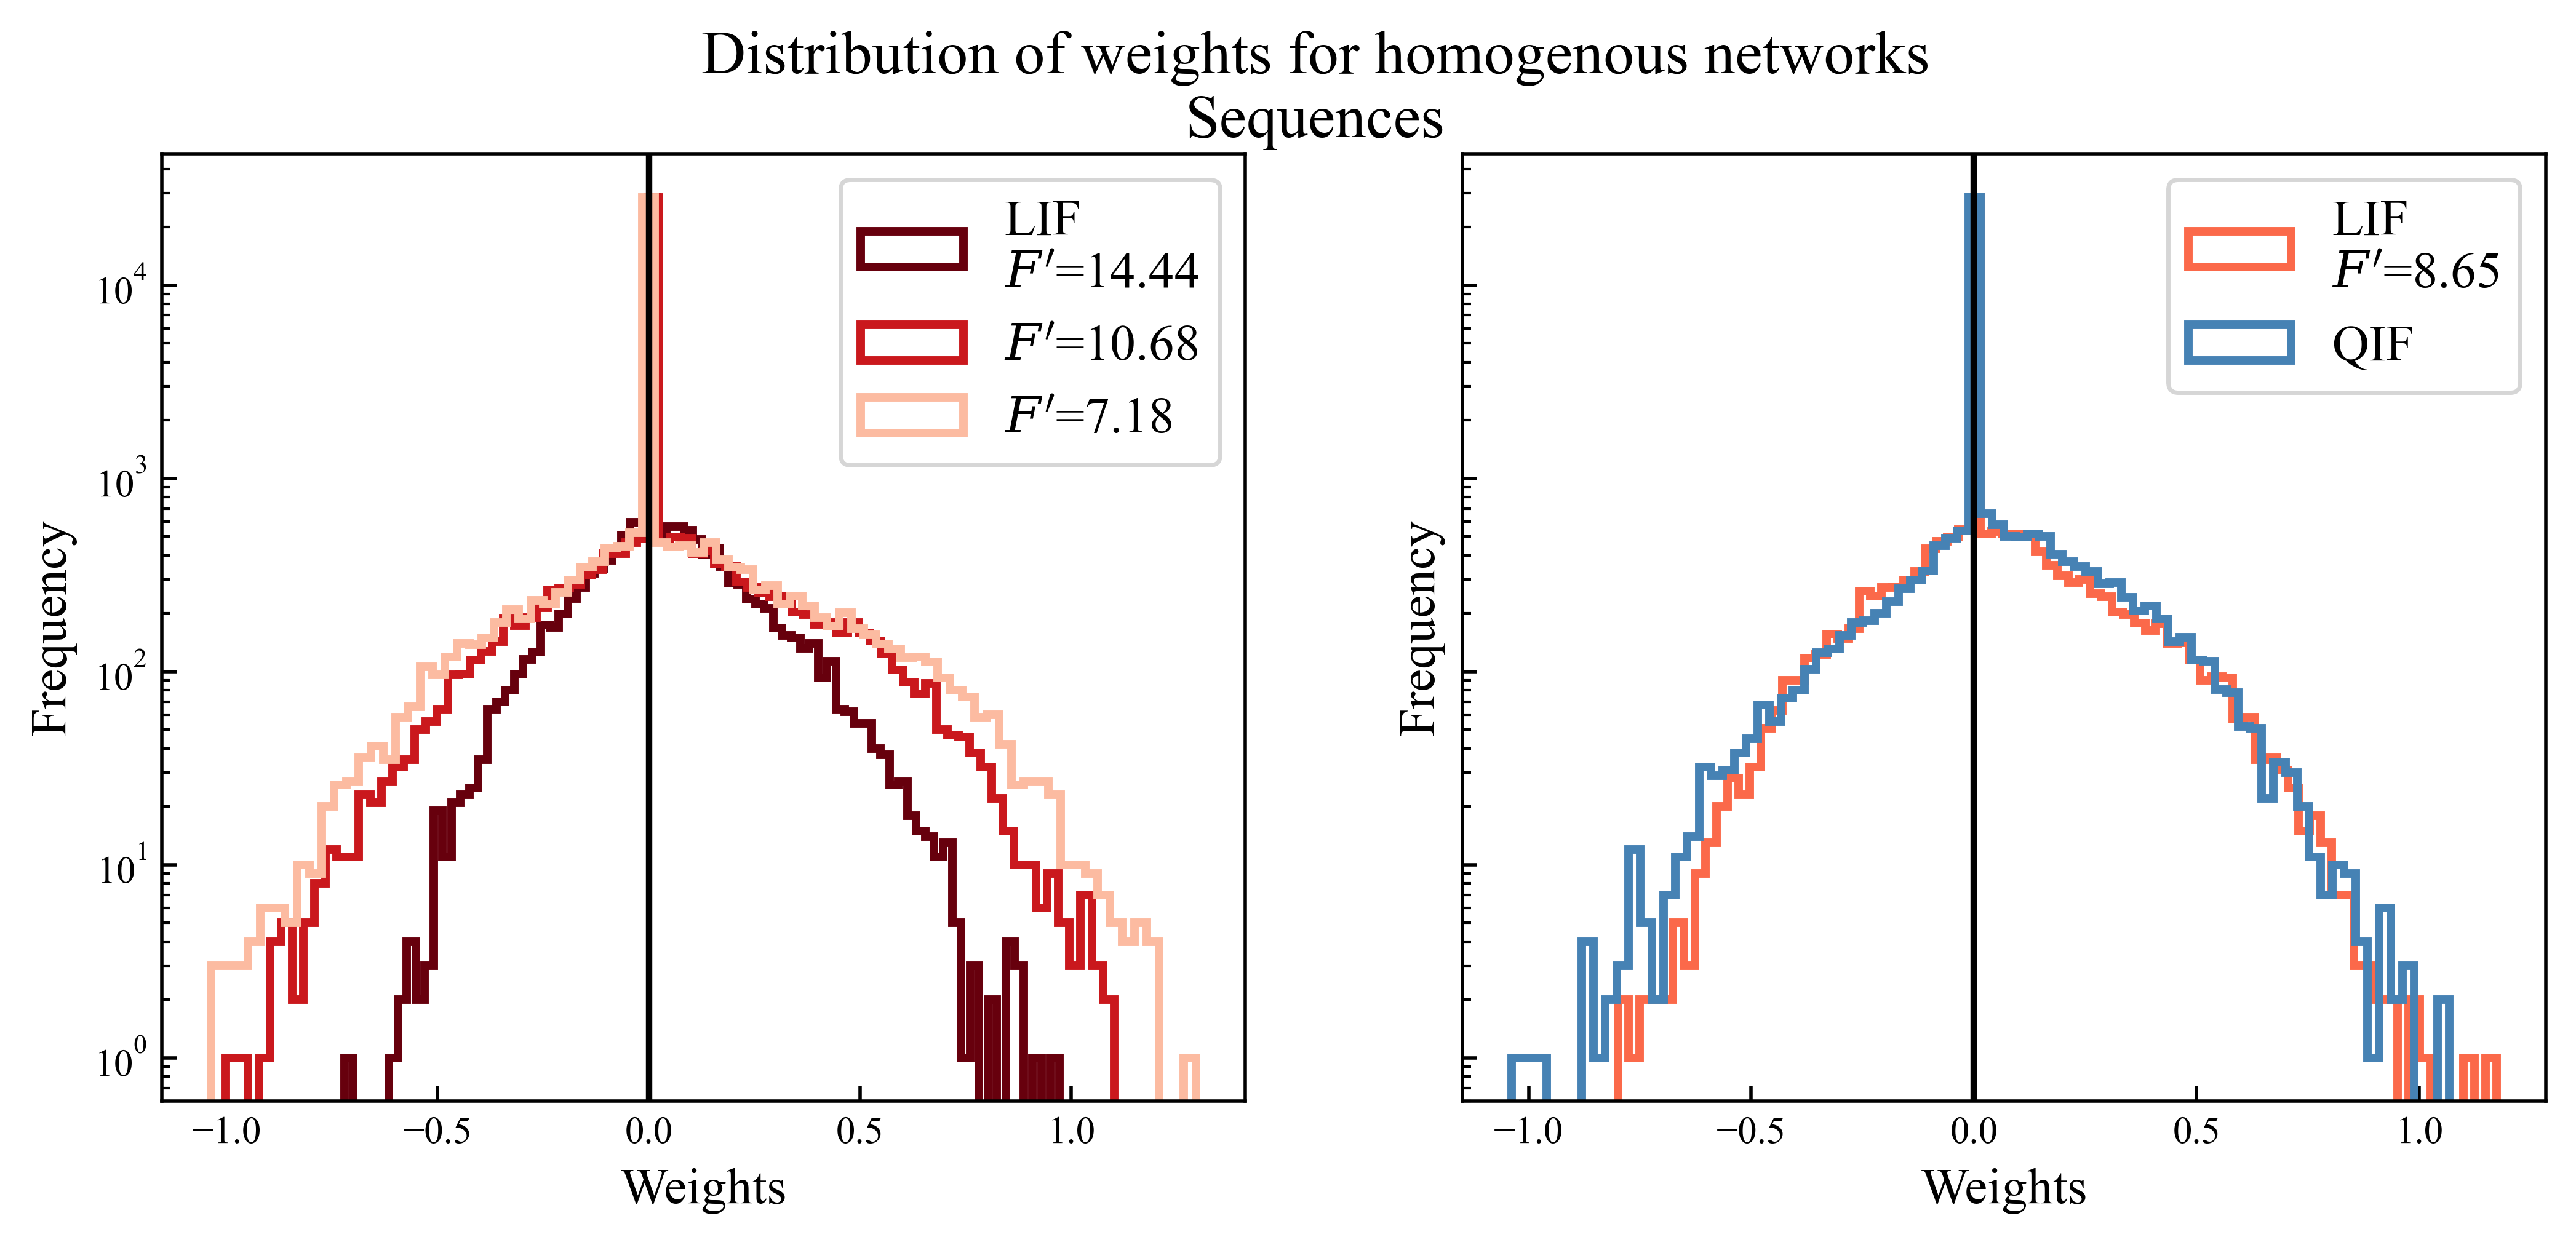

In [6]:
# ========== Histogram of weight distribution for homogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = [10.74]
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
seed_number = [i for i in range(0, 1)] 

########## Figure loop ##########
for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Create figure and axes

    fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(10,4),  # TODO review
        sharey=True
    )

    # ax_map = {
    #     'A': axes[0],
    #     'B': axes[1],
    # }

    for sim, vr, f in zip(simulation_number, vrest, slope):
        for pqif in pqif_homogenous:
            for seed in seed_number:

                #### Take out values to plot

                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif) & (wDF['seed'] == seed)]  # Current row of dataframe with metadata

                ID = df_filtered['simulationID'].item()  # Simulation ID

                current_weights = weights_dict[ID]  # Weight array (flattened)


                #### Color formatting

                if pqif == 1:
                    colors = 'steelblue'
                else:
                    colors = color_map_vrest[vr]


                #### Figure control flow

                if pqif == 0 and f in [14.44, 10.68, 7.18]:  # Left

                    if sim == simulation_number[0]:  # LIF header in legend
                        label = f"LIF\n$F'$={f}"
                    else:
                        label = f"$F'$={f}"

                    ax1.hist(current_weights, bins=80, log=True, color=colors, alpha=1, linewidth=2, histtype='step', label=label)
                    
                elif f == 8.65:  # Right
                    if pqif == 0:
                        label = f"LIF\n$F'$={f}"
                    else:
                        label = 'QIF'

                    ax2.hist(current_weights, bins=80, log=True, color=colors, alpha=1, linewidth=2, histtype='step', label=label)

                else:  # Ignore others
                    continue


    #### Shared formatting
    plt.suptitle(f"Distribution of weights for homogenous networks\n{dyn.capitalize()}")
    for ax in (ax1, ax2):
        ax.legend()
        ax.set_xlabel("Weights")
        ax.set_ylabel("Frequency")
        ax.axvline(0, color="black")
    plt.show()

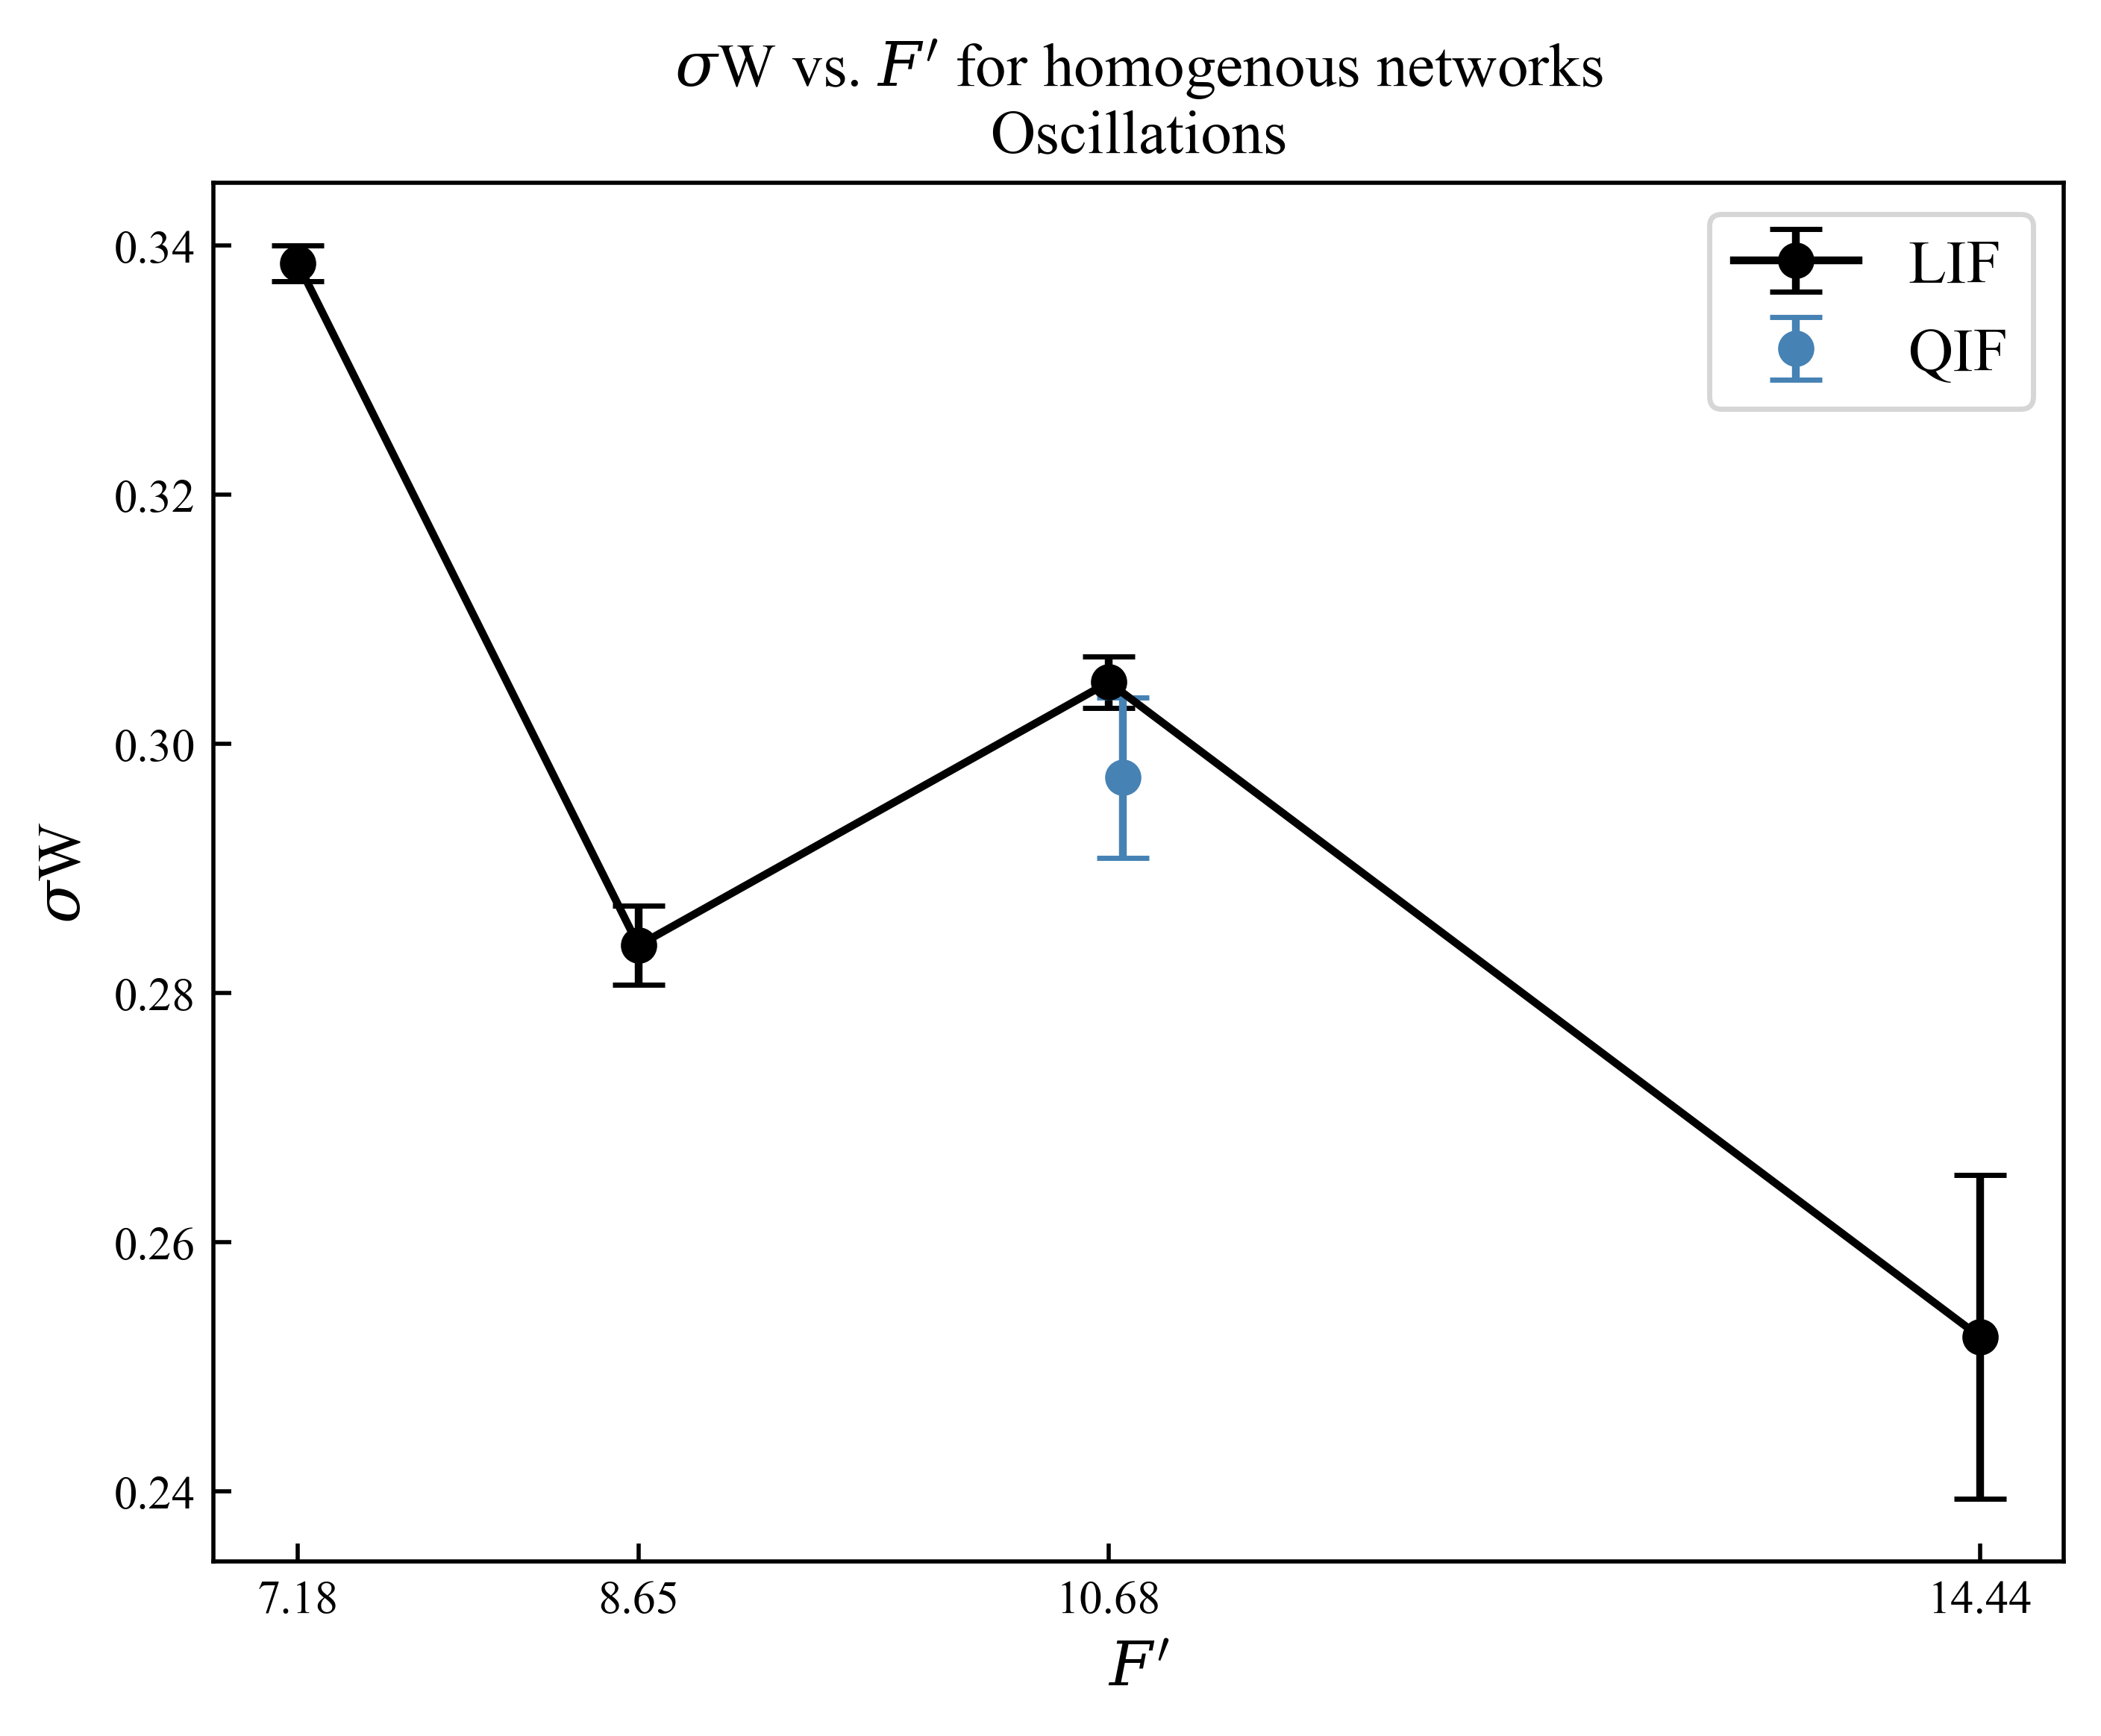

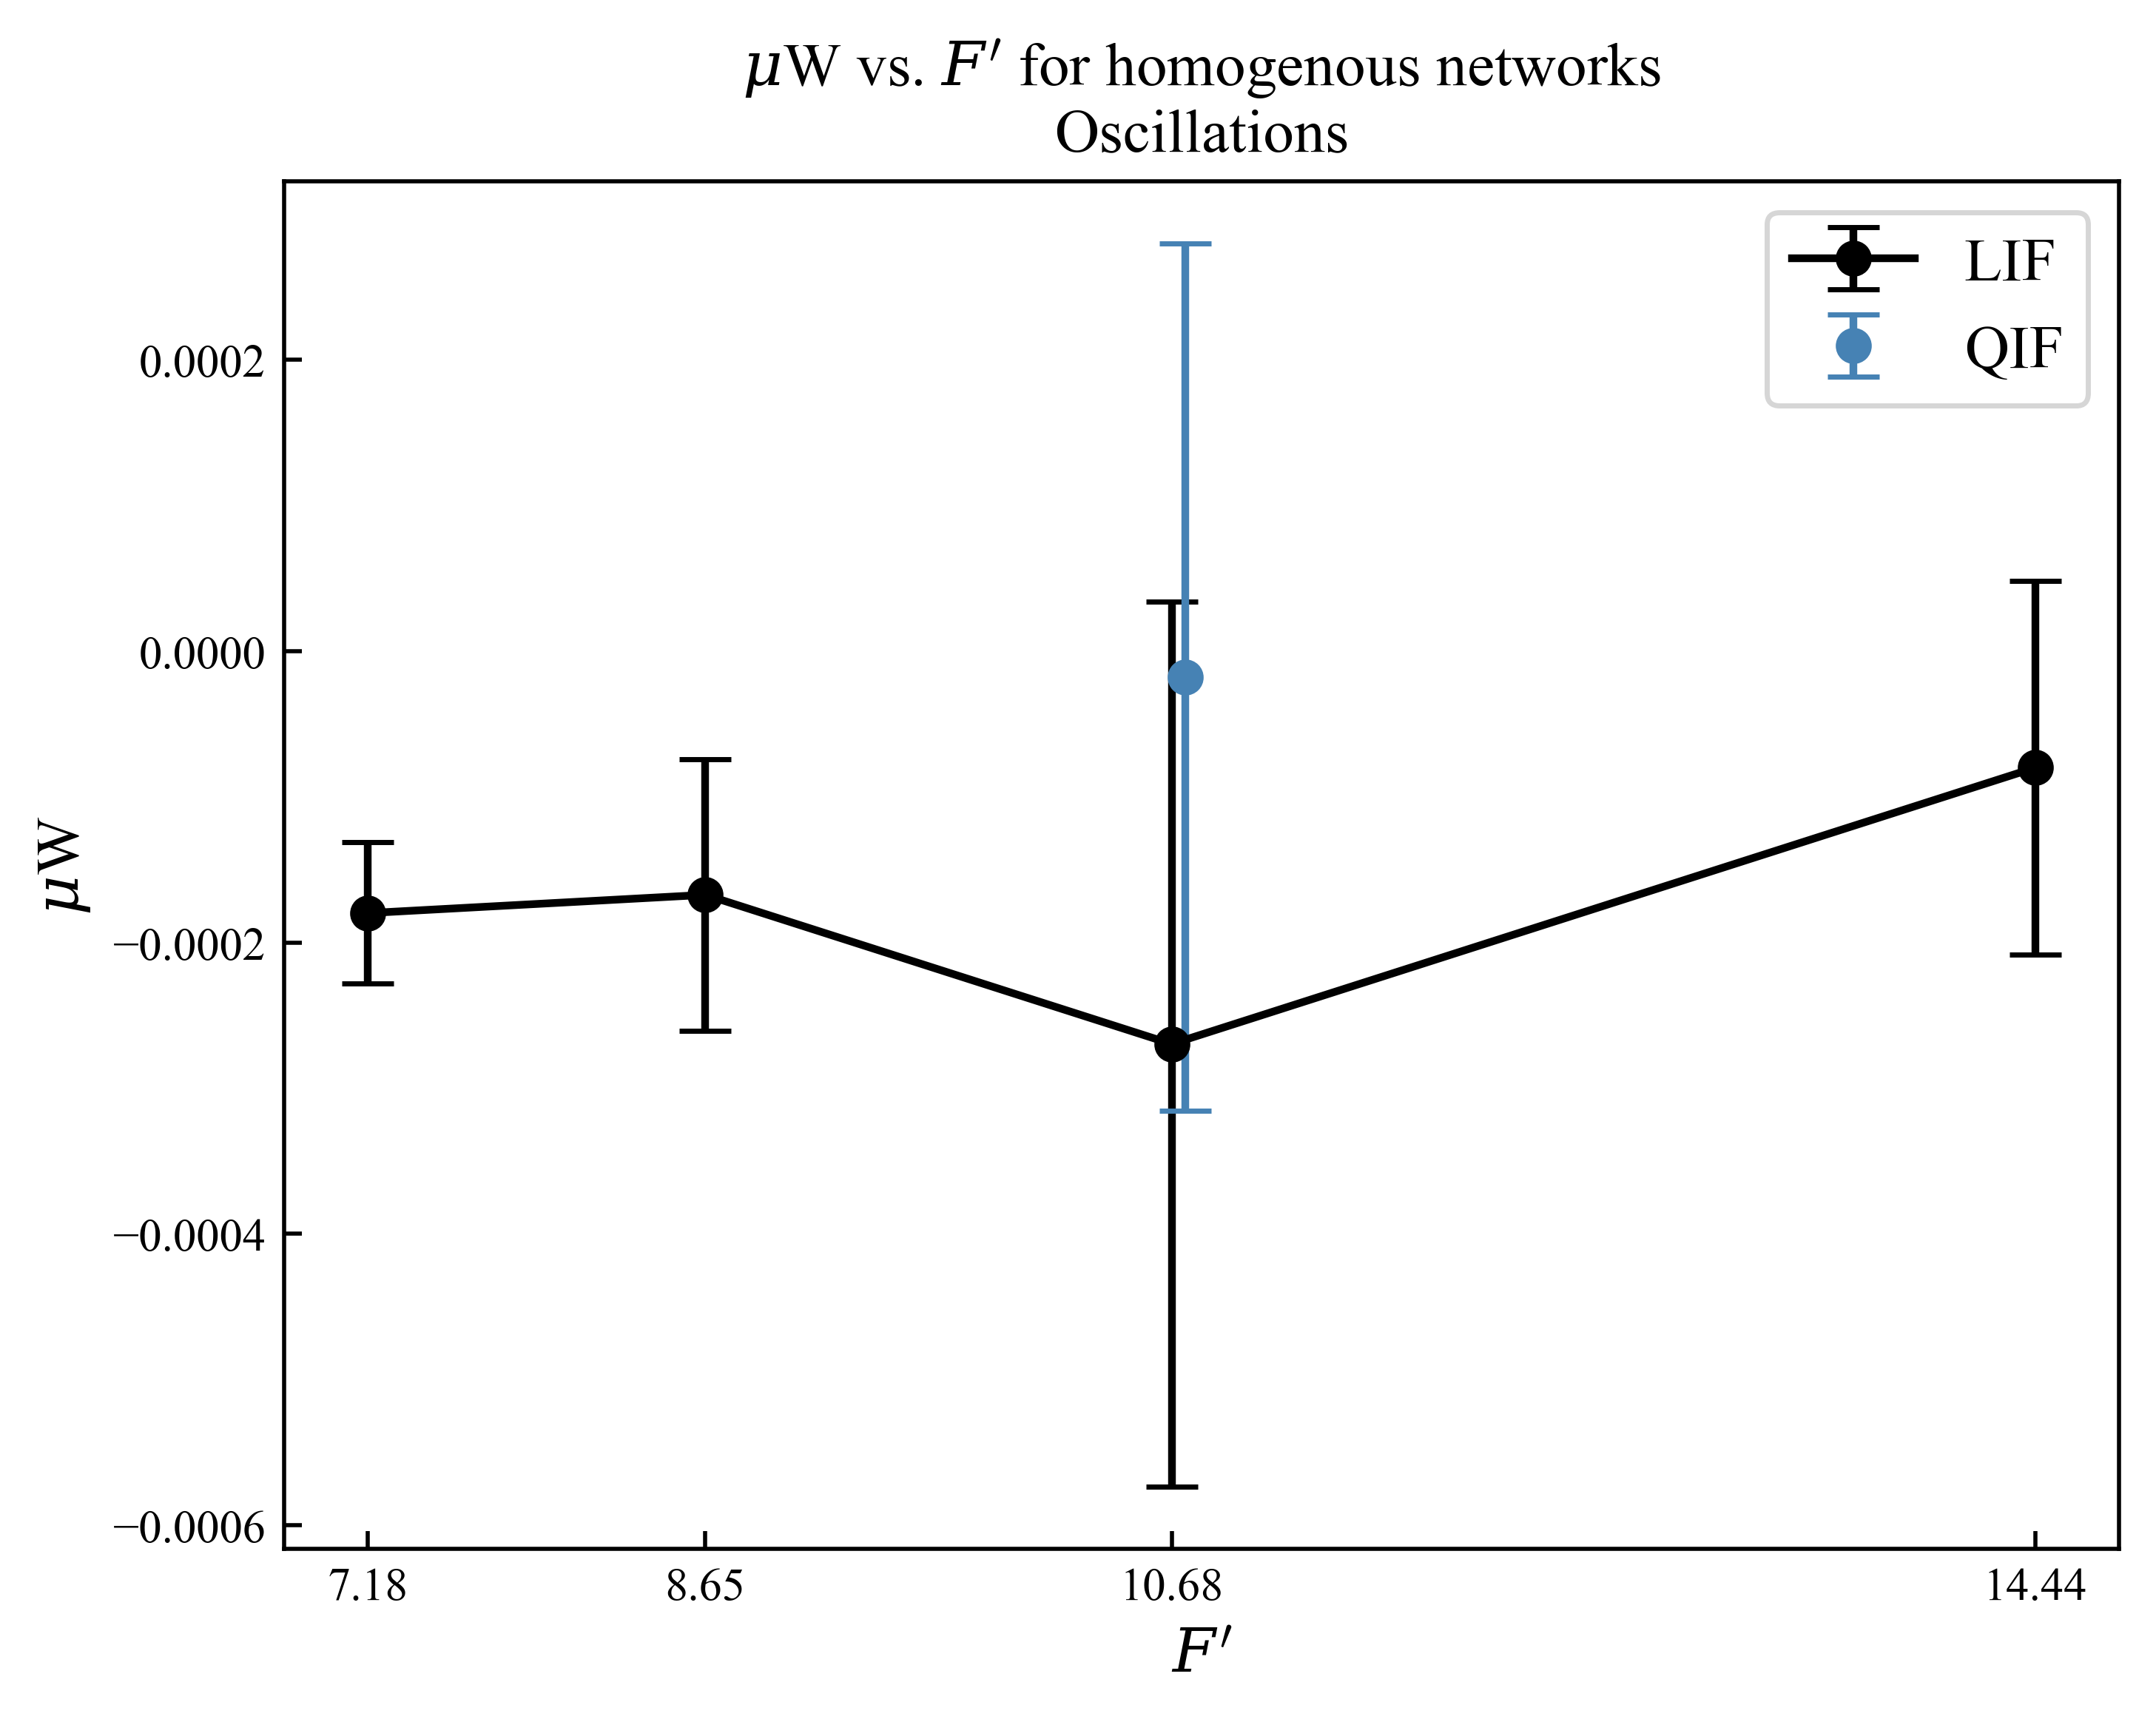

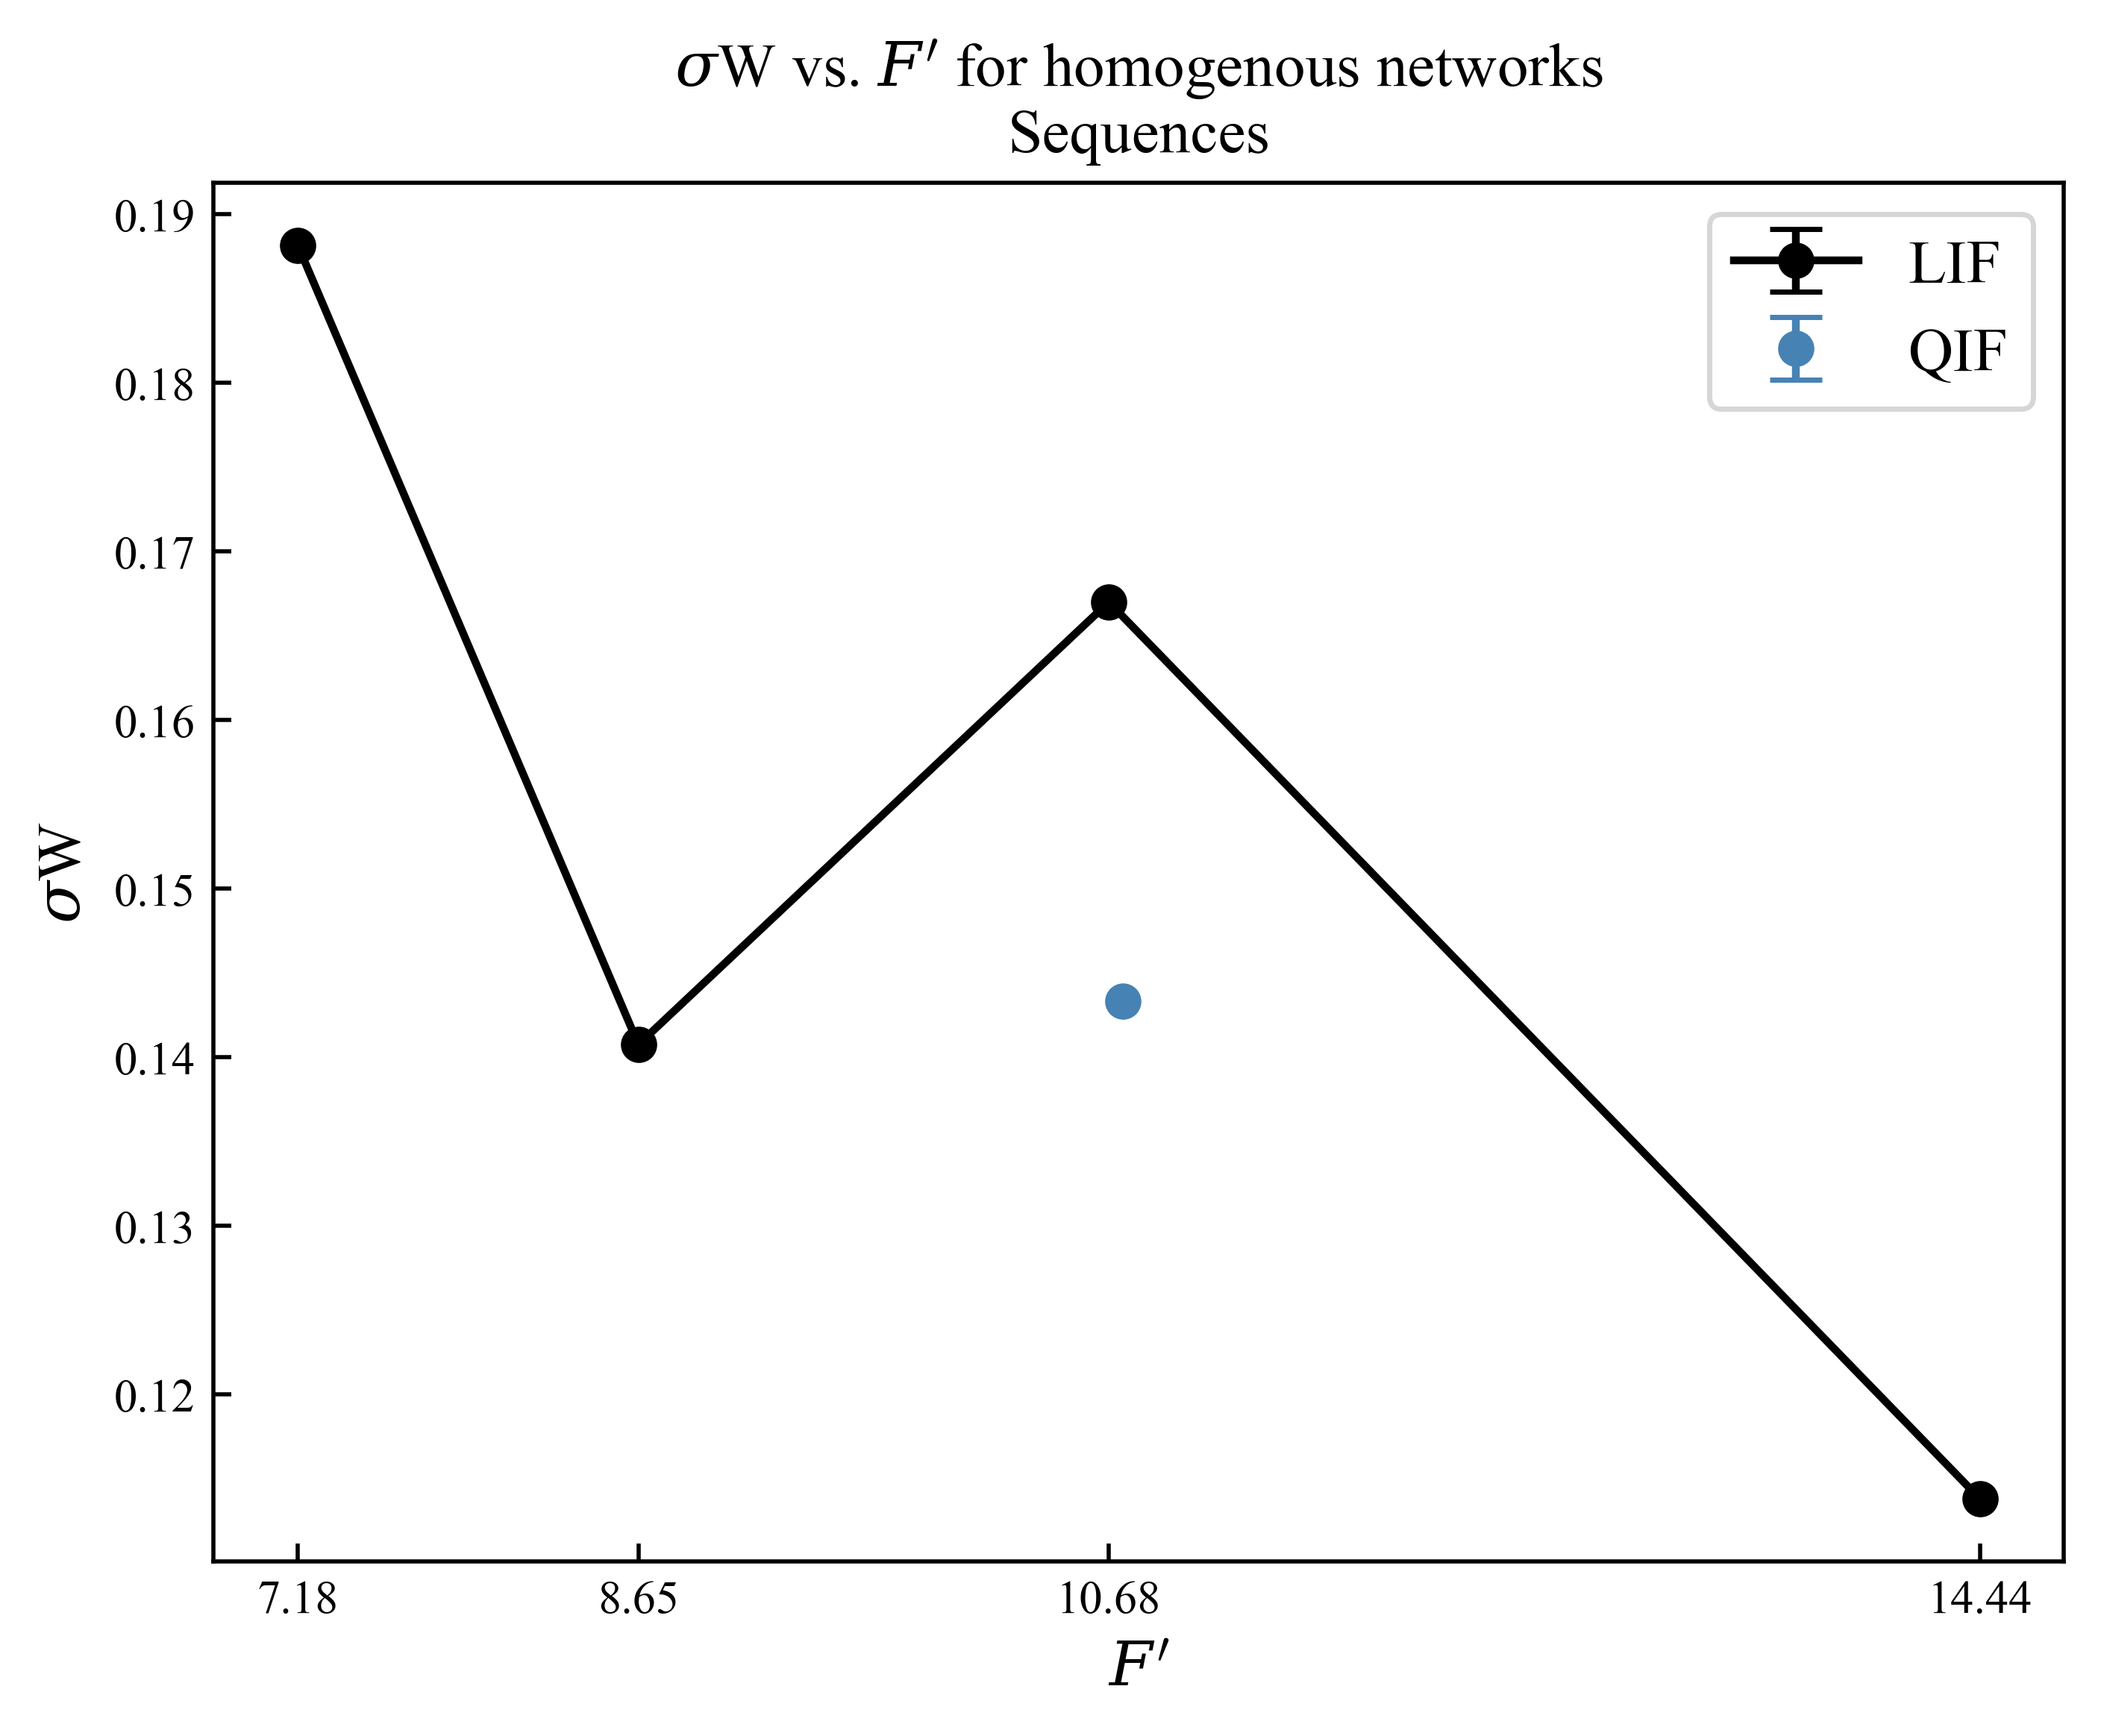

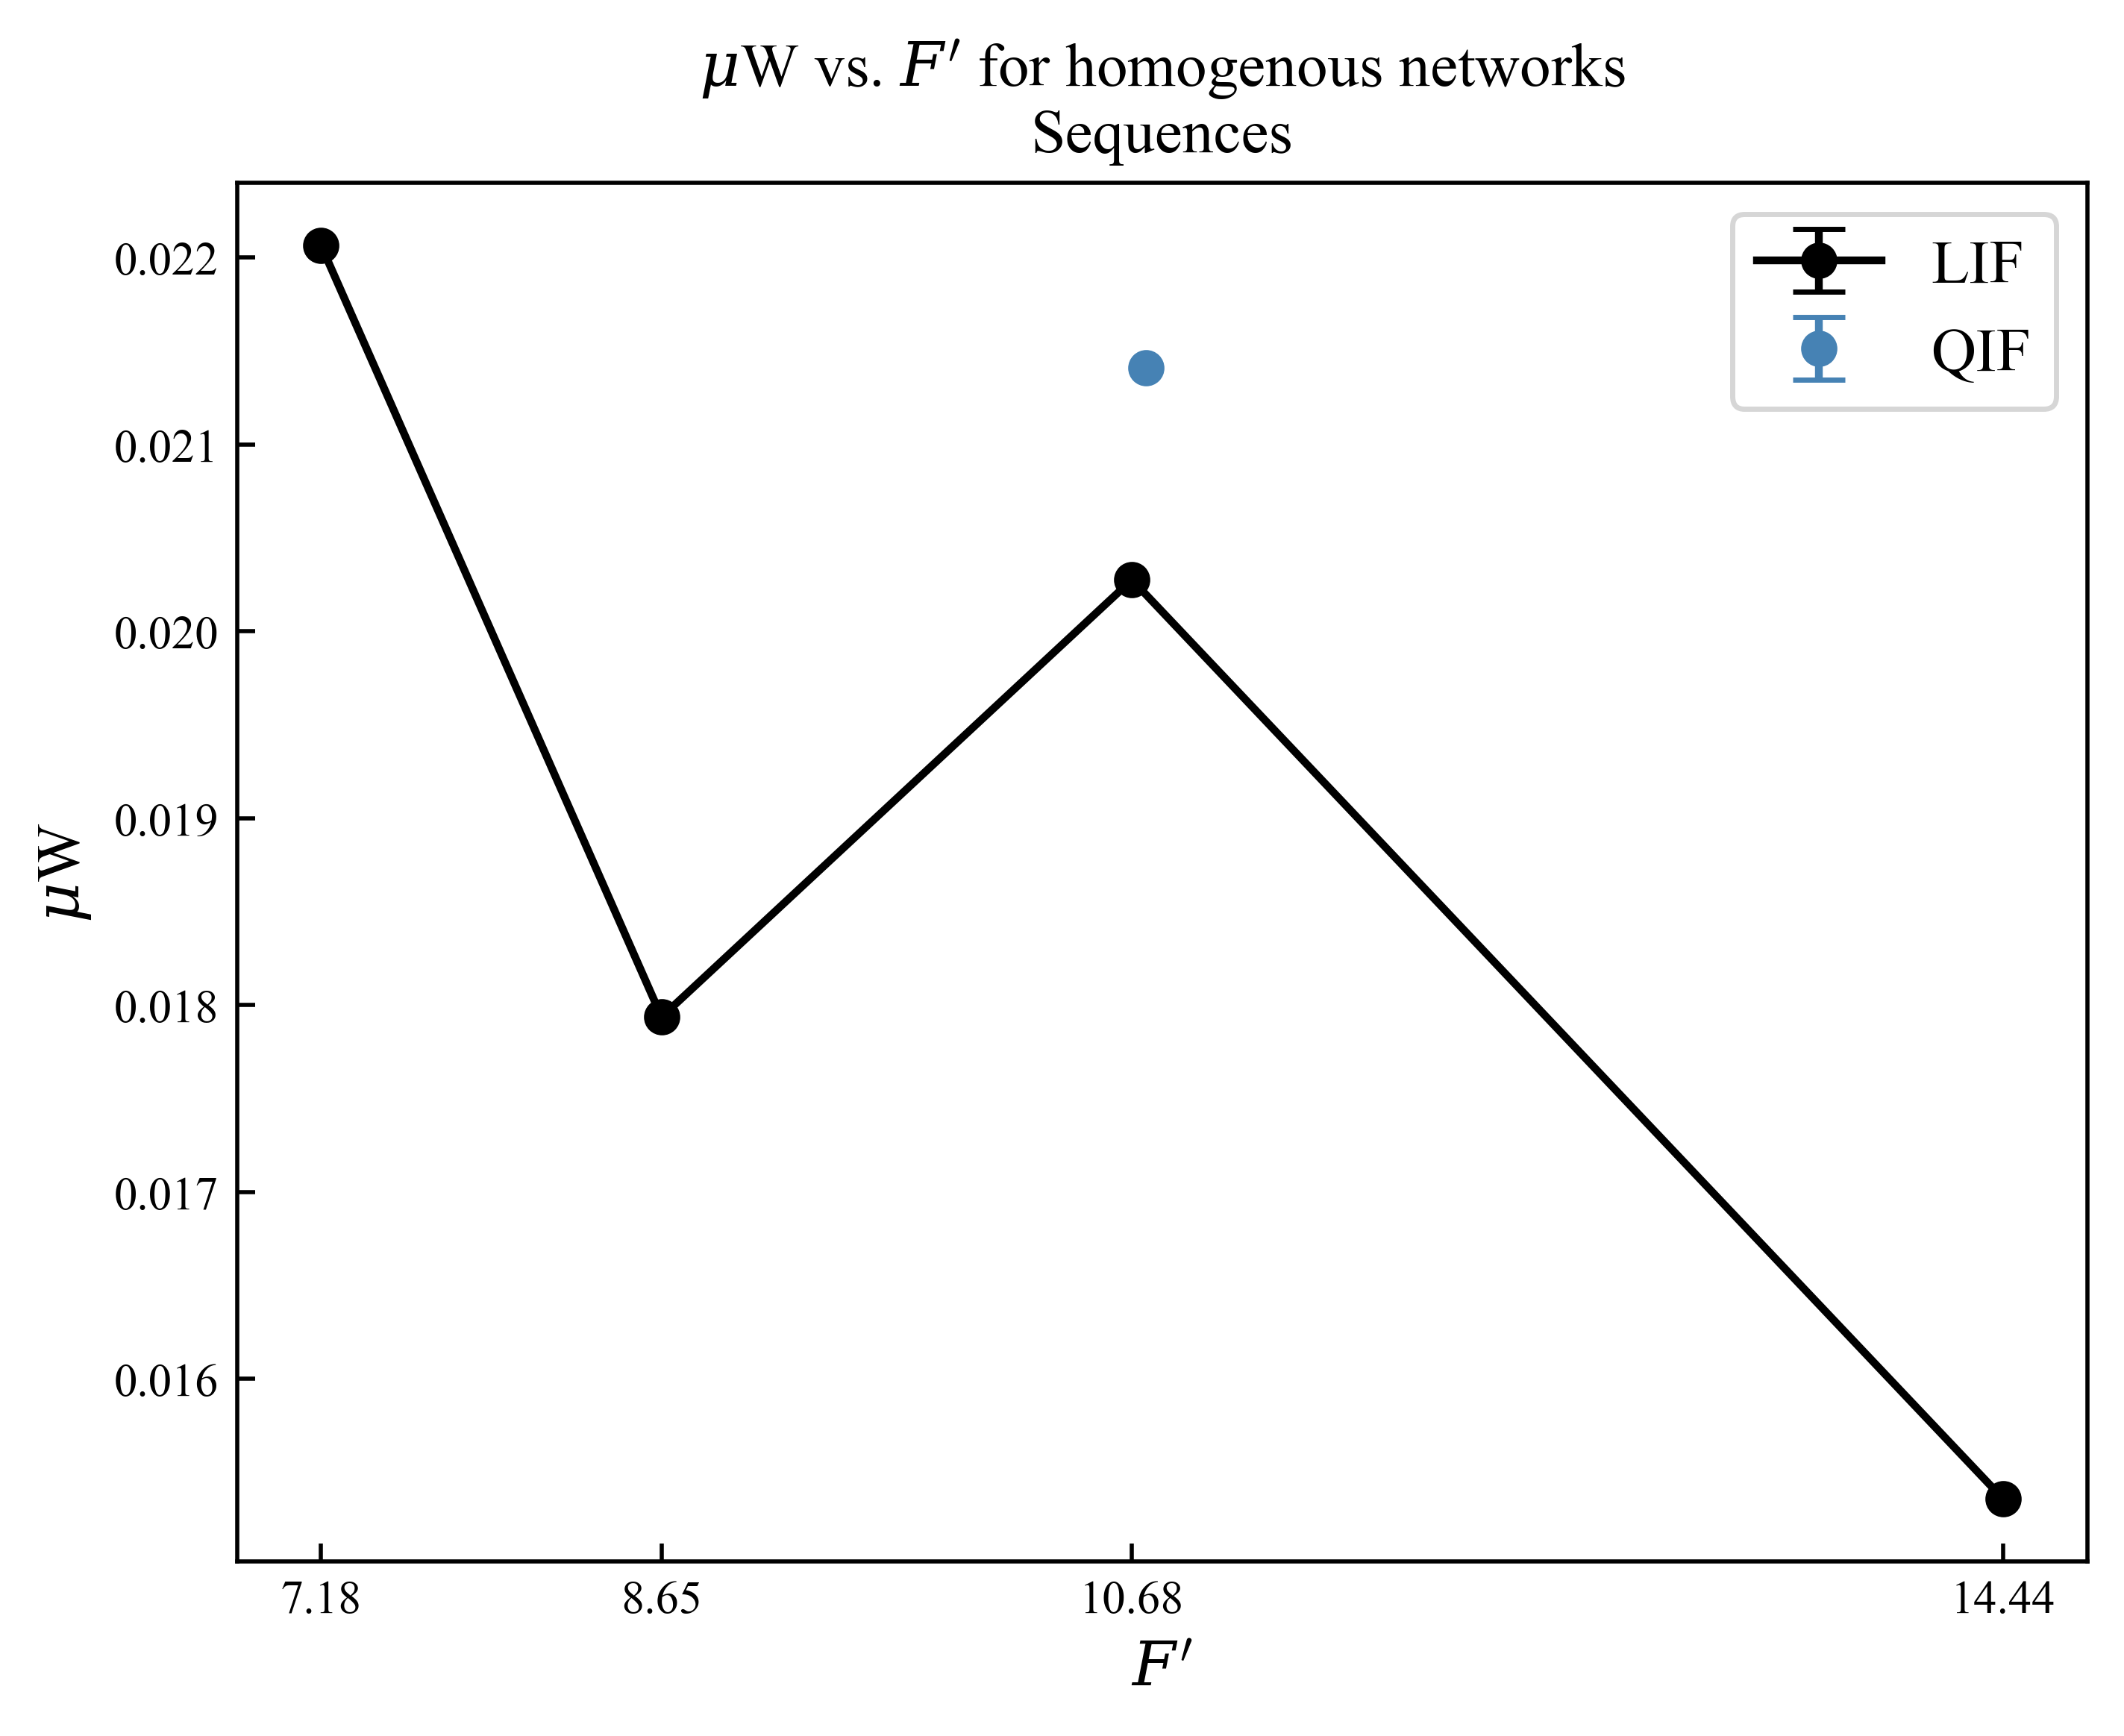

In [ ]:
# ========== Standard deviation or Mean of weights vs. slope for homogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 1)]

columns = ['std', 'mean']

x_ticks = [14.44, 10.68, 8.65, 7.18]

########## Figure loop ##########

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Plot same figures for both STD and mean
    for c in columns:

        fig, ax = plt.subplots()


        for pqif in pqif_homogenous:

            y = []
            yerr = []
            x = slope


            for sim, vr, f in zip(simulation_number, vrest, slope):

                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif)]  # Current row of dataframe with metadata. Include all seeds since we want errorbars

                # Y: Mean of Y
                y_i = df_filtered[c].mean()

                # Y-error: STD of Y
                yerr_i = df_filtered[c].std()

                if pqif == 0: # For LIF: Make list across slope
                    y.append(y_i)
                    yerr.append(yerr_i)

                elif pqif == 1:  # Only one value for QIF since it is the same in each simulation
                    y = y_i
                    yerr = yerr_i

            colors = color_map_pqif[pqif]

            #### Title and labels depending on if STD or mean 

            if c == 'std':
                title = f"$\sigma$W vs. $F'$ for homogenous networks\n{dyn.capitalize()}"
                xlabel = f"$F'$"
                ylabel = f"$\sigma$W"

            elif c == "mean":
                title = f"$\mu$W vs. $F'$ for homogenous networks\n{dyn.capitalize()}"
                xlabel = f"$F'$"
                ylabel = f"$\mu$W"

            #### Plot values on ax

            if pqif == 0:
                label = 'LIF'
                ax.errorbar(x, y, yerr, fmt='o-', capsize=5, color=colors, label=label)

            elif pqif == 1:
                label = 'QIF'
                ax.errorbar(slope_qif, y, yerr, fmt='o', capsize=5, color=colors, label=label)

        ax.set_title(title)
        ax.set_xticks(x_ticks)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.legend()
        plt.show()



In [53]:
list_repeatednumber = [1 for i in range(1, 5)]
print(list_repeatednumber)

to_set = set(list_repeatednumber)
print(to_set)

to_list = list(to_set)

print(to_list)

[1, 1, 1, 1]
{1}
[1]


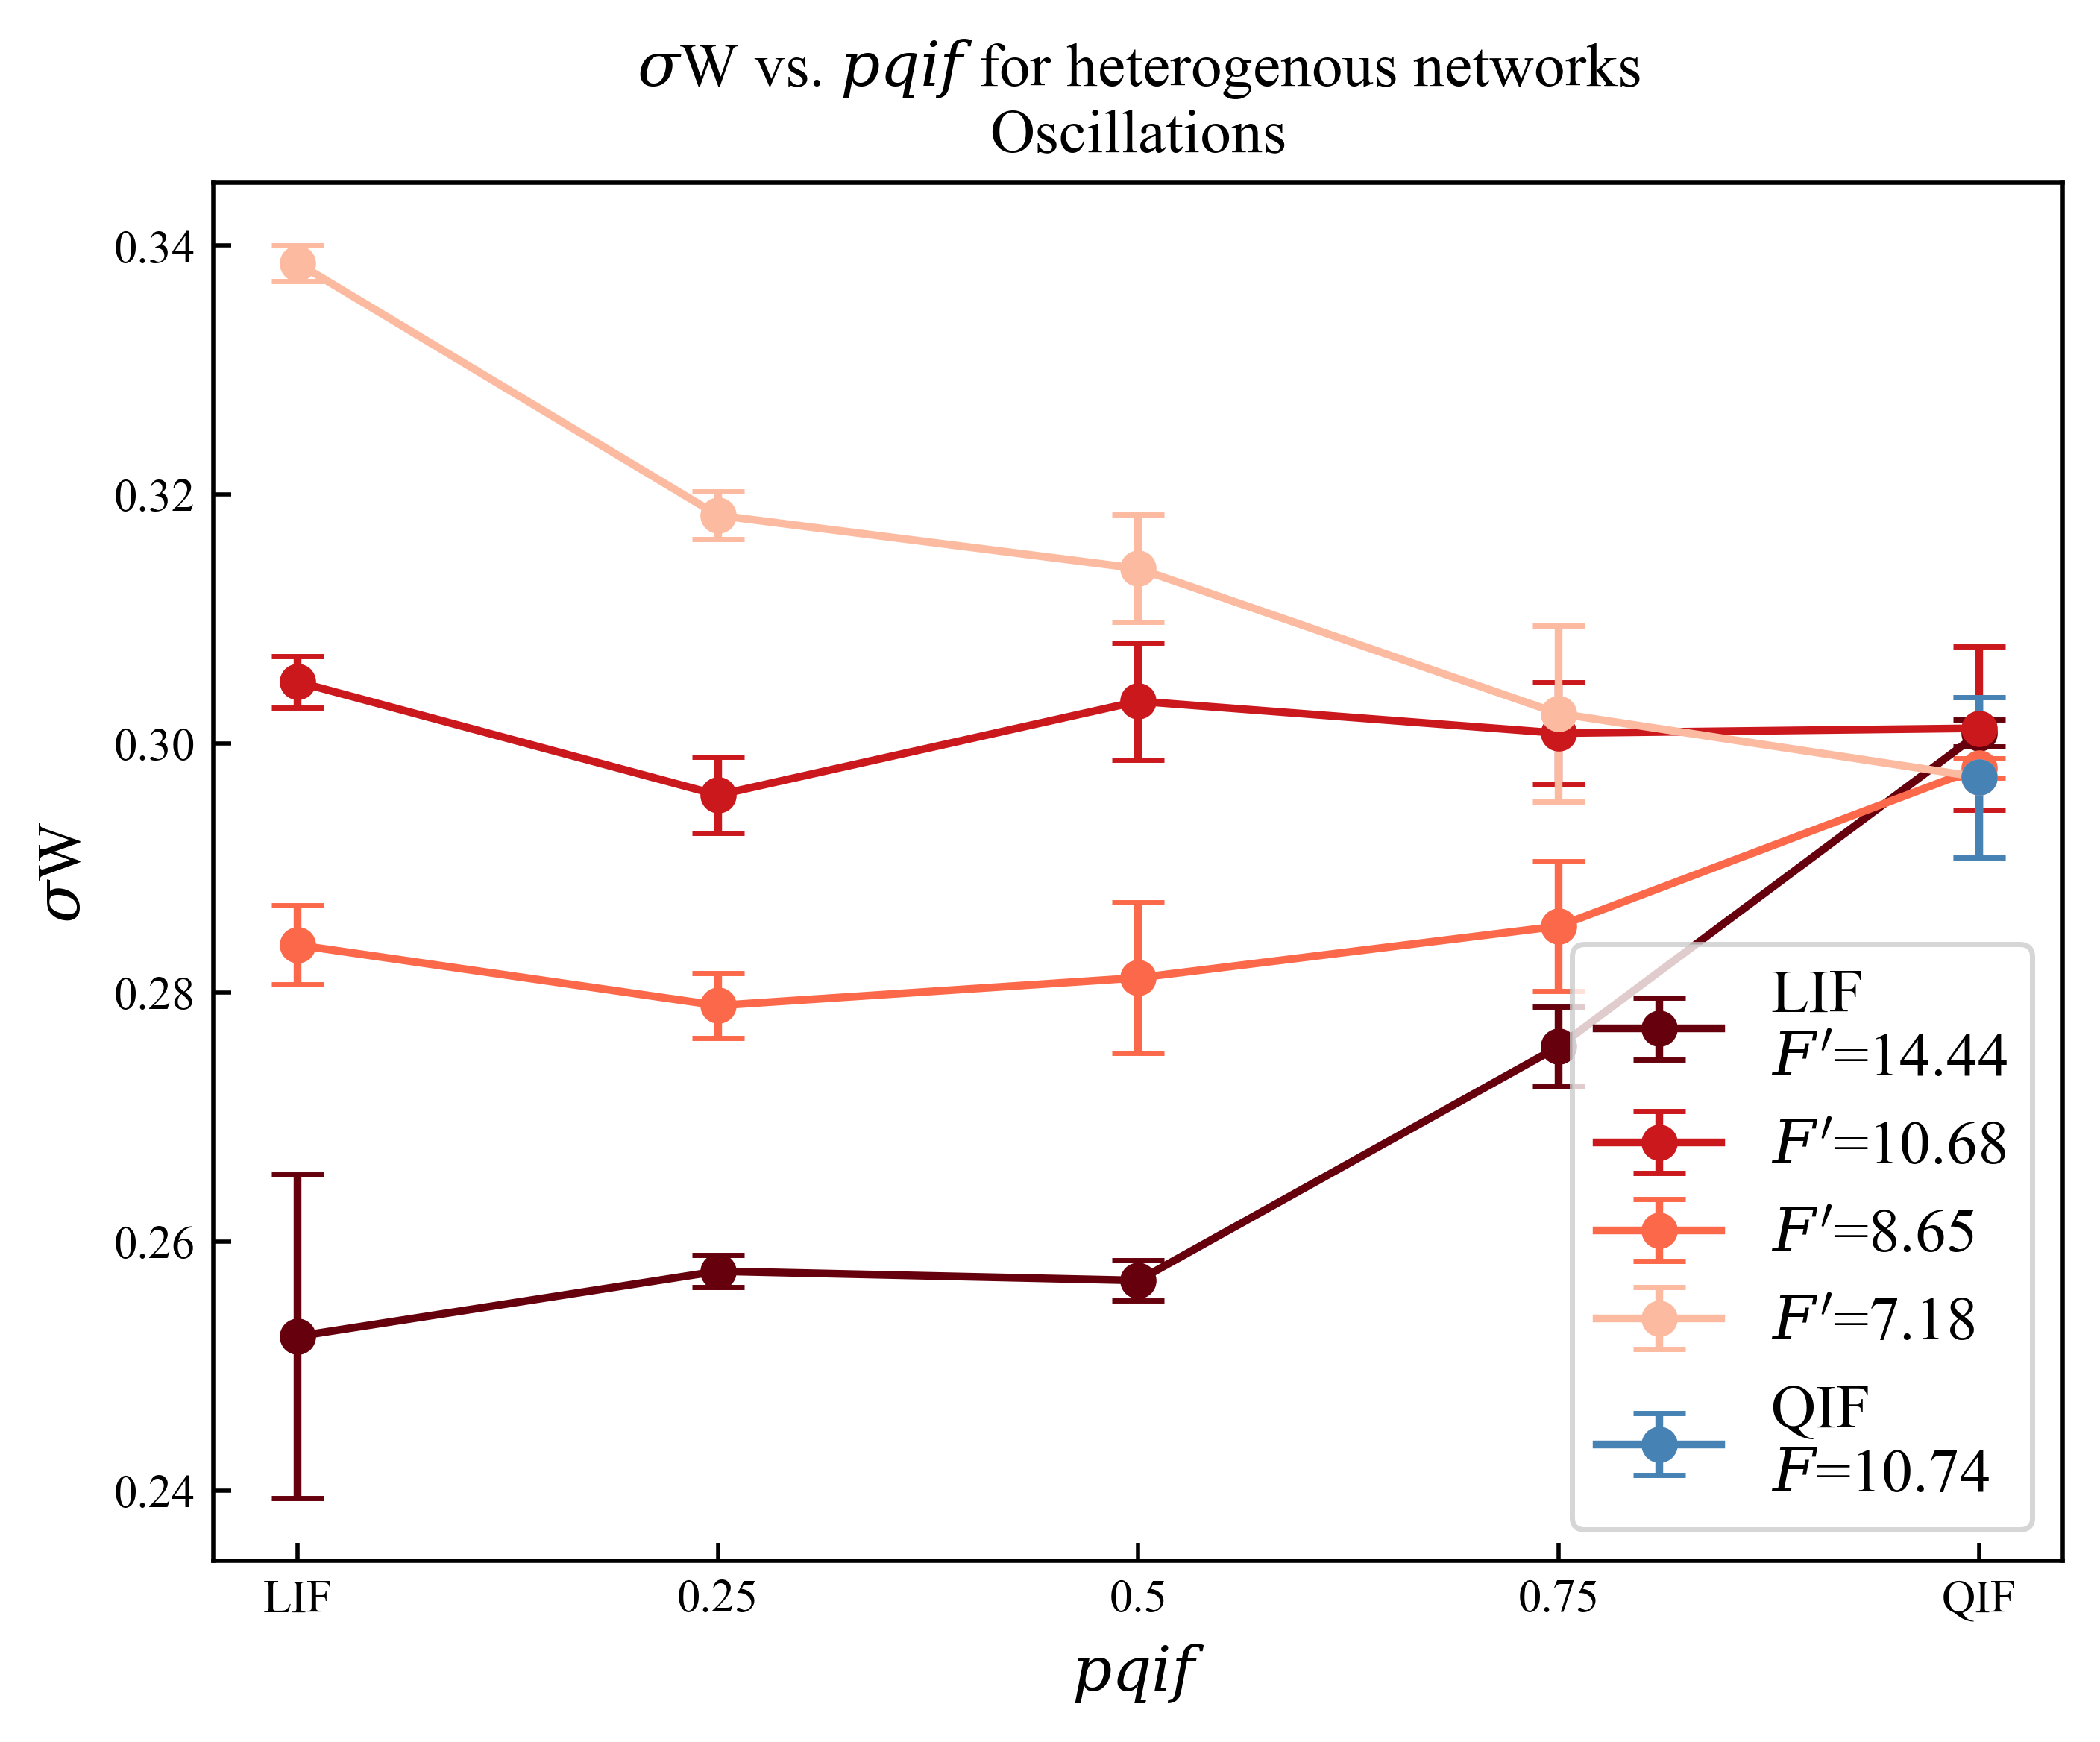

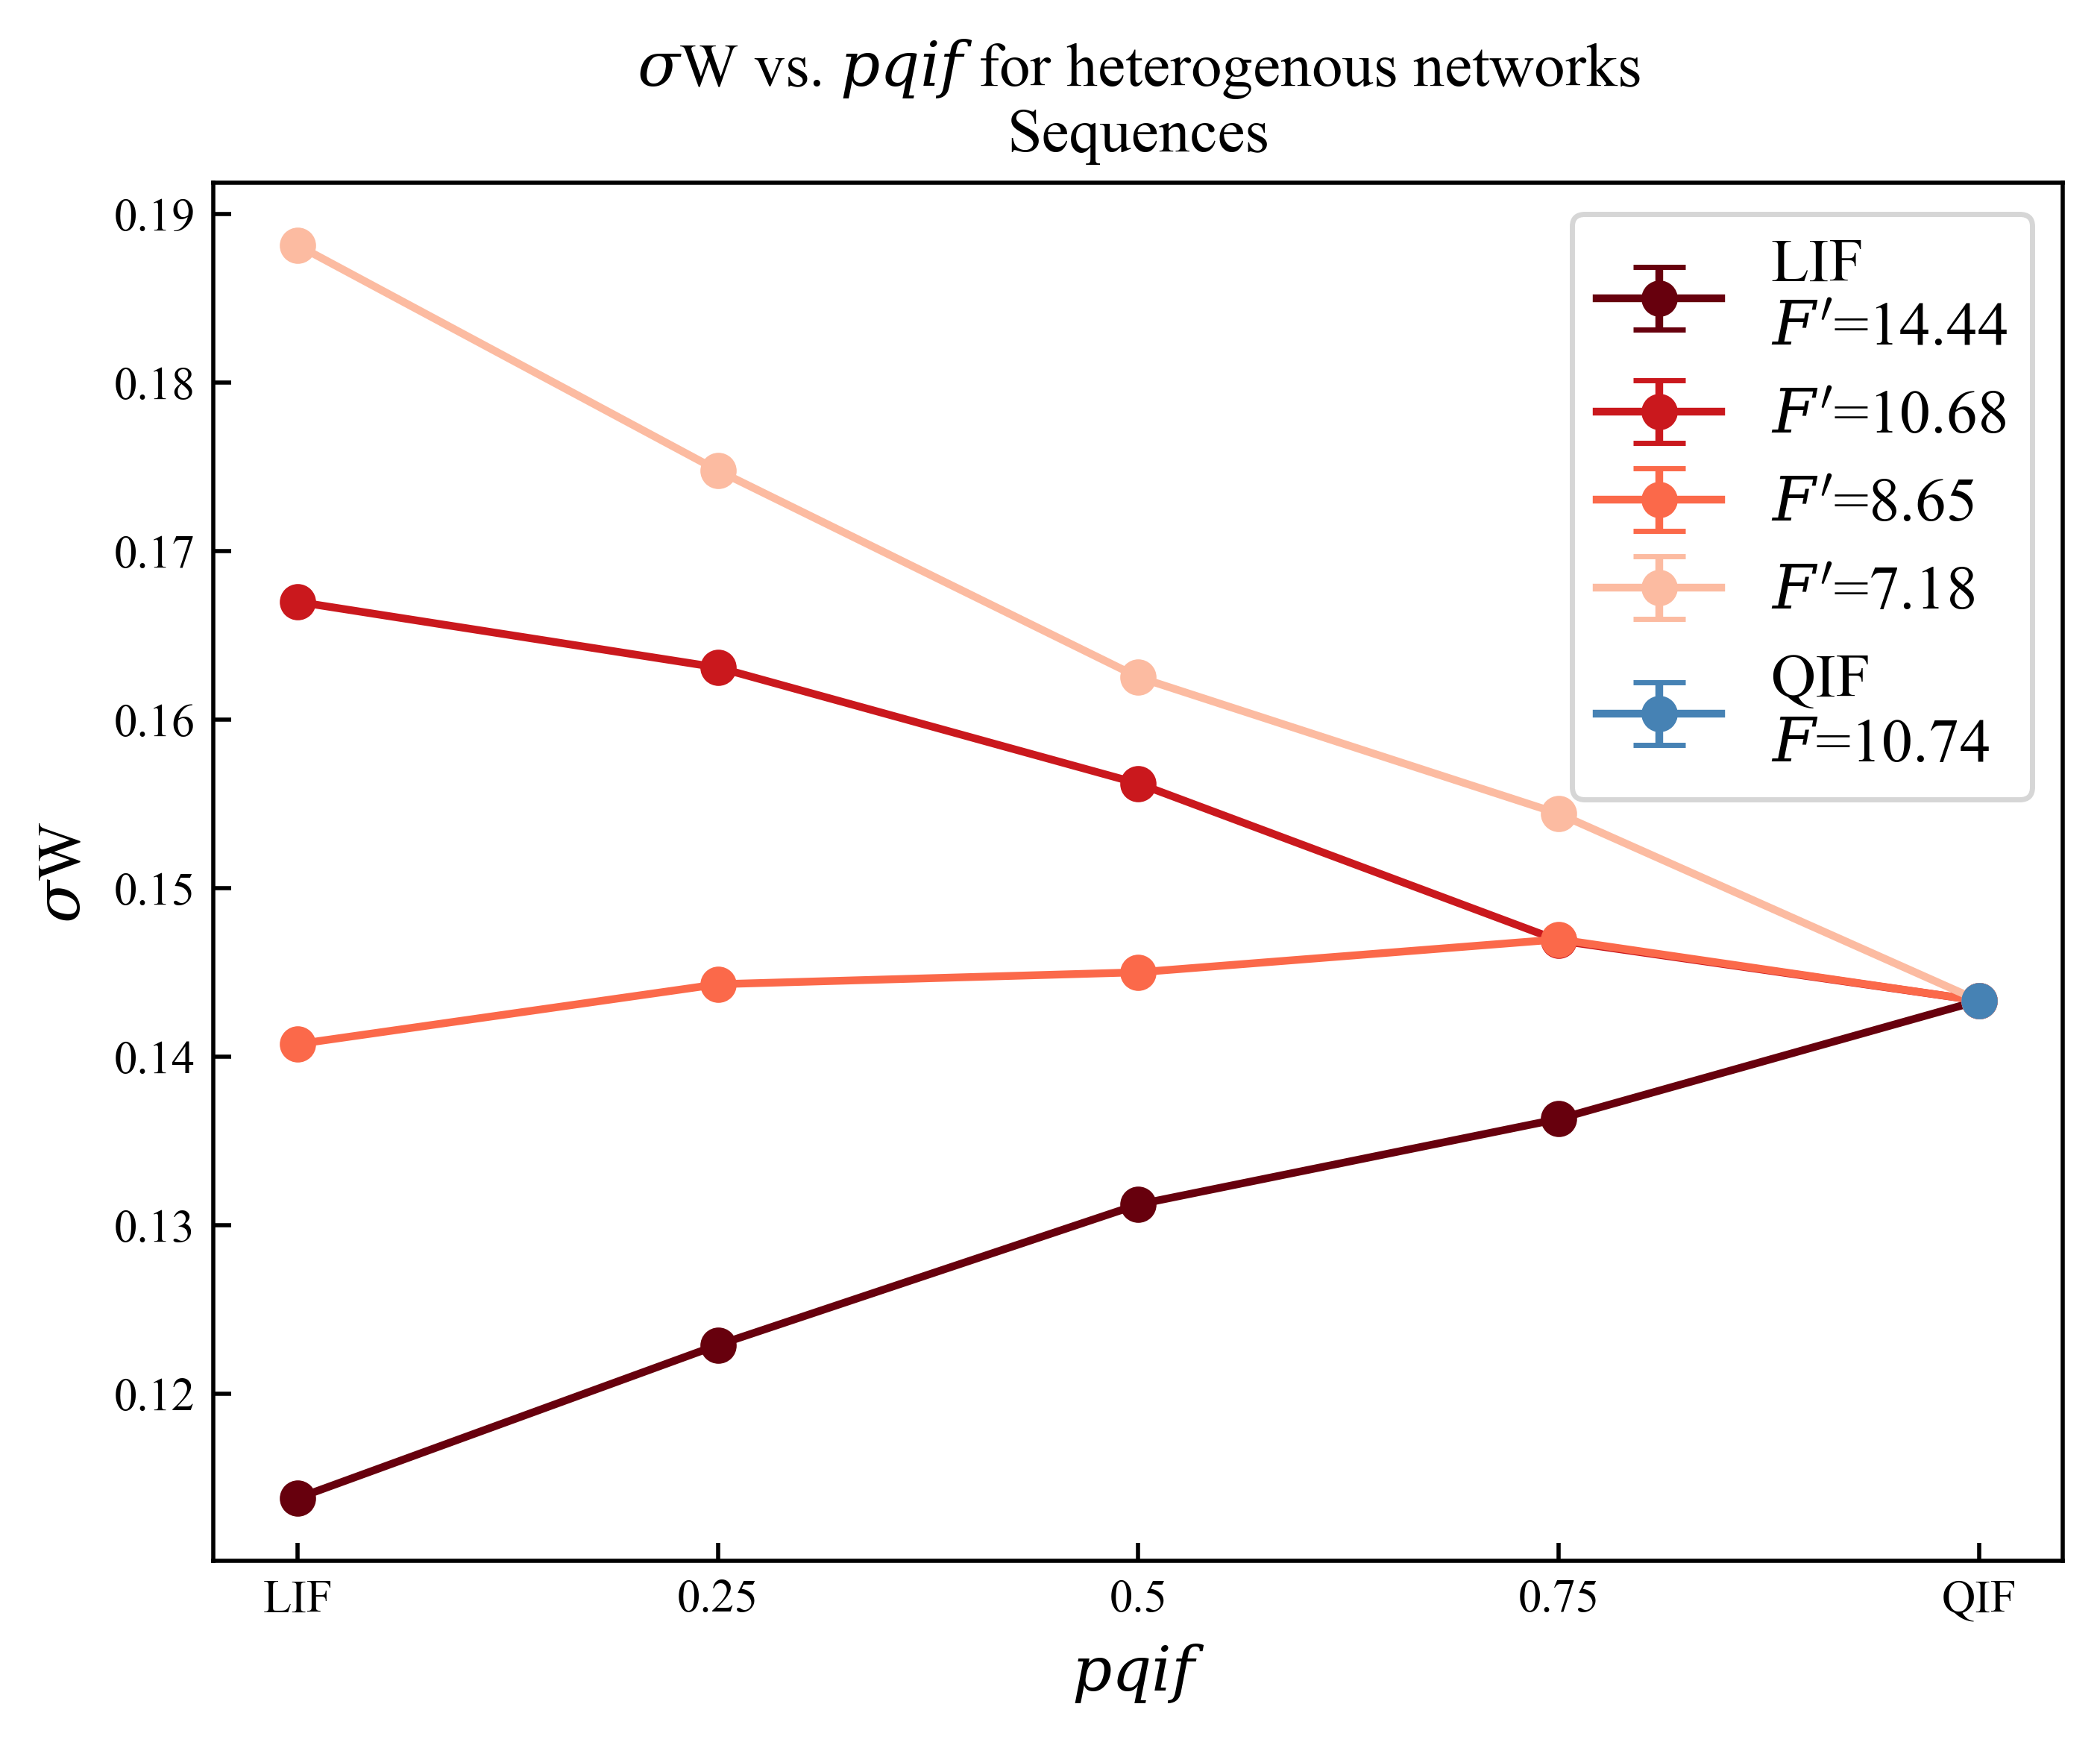

In [ ]:
# ========== Standard deviation of weights vs. pqif for heterogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 1)]

columns = ['std']

x_ticks = ['LIF', 0.25, 0.5, 0.75, 'QIF']

########## Figure loop ##########

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Plot same figures for both STD and mean
    for c in columns:

        fig, ax = plt.subplots()


        for sim, vr, f in zip(simulation_number, vrest, slope):

            y = []
            yerr = []
            x = pqif_number

            for pqif in pqif_number:


                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif)]  # Current row of dataframe with metadata. Include all seeds since we want errorbars

                # Y: Mean of Y
                y_i = df_filtered[c].mean()

                # Y-error: STD of Y
                yerr_i = df_filtered[c].std()


                y.append(y_i)
                yerr.append(yerr_i)


            if (sim == simulation_number[0]):
                label = f"LIF\n$F'$={f}"
            else:
                label = f"$F'$={f}"


            ax.errorbar(x, y, yerr, fmt='o-', capsize=5, color=color_map_vrest[vr], label=label)

        
            ########## Title and tick labels ##########
            if c == 'std':
                title = f"$\sigma$W vs. $pqif$ for heterogenous networks\n{dyn.capitalize()}"
                xlabel = f"$pqif$"
                ylabel = f"$\sigma$W"

            elif c == "mean":
                title = f"$\mu$W vs. $pqif$ for heterogenous networks\n{dyn.capitalize()}"
                xlabel = f"$pqif$"
                ylabel = f"$\mu$W"


        ########## Add QIF ##########
        df_filtered_qif = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == 1)]

        y_qif = df_filtered_qif[c].mean()  # y
        yerr_qif = df_filtered_qif[c].std()  # y-error
        x_qif = 1  # x

        ax.errorbar(x_qif, y_qif, yerr_qif, fmt='o-', capsize=5, color='steelblue', label=f"QIF\n$F'$={slope_qif}")

        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_xticks(pqif_number, x_ticks)
        ax.set_ylabel(ylabel)
        plt.legend()
        plt.show()

    
    

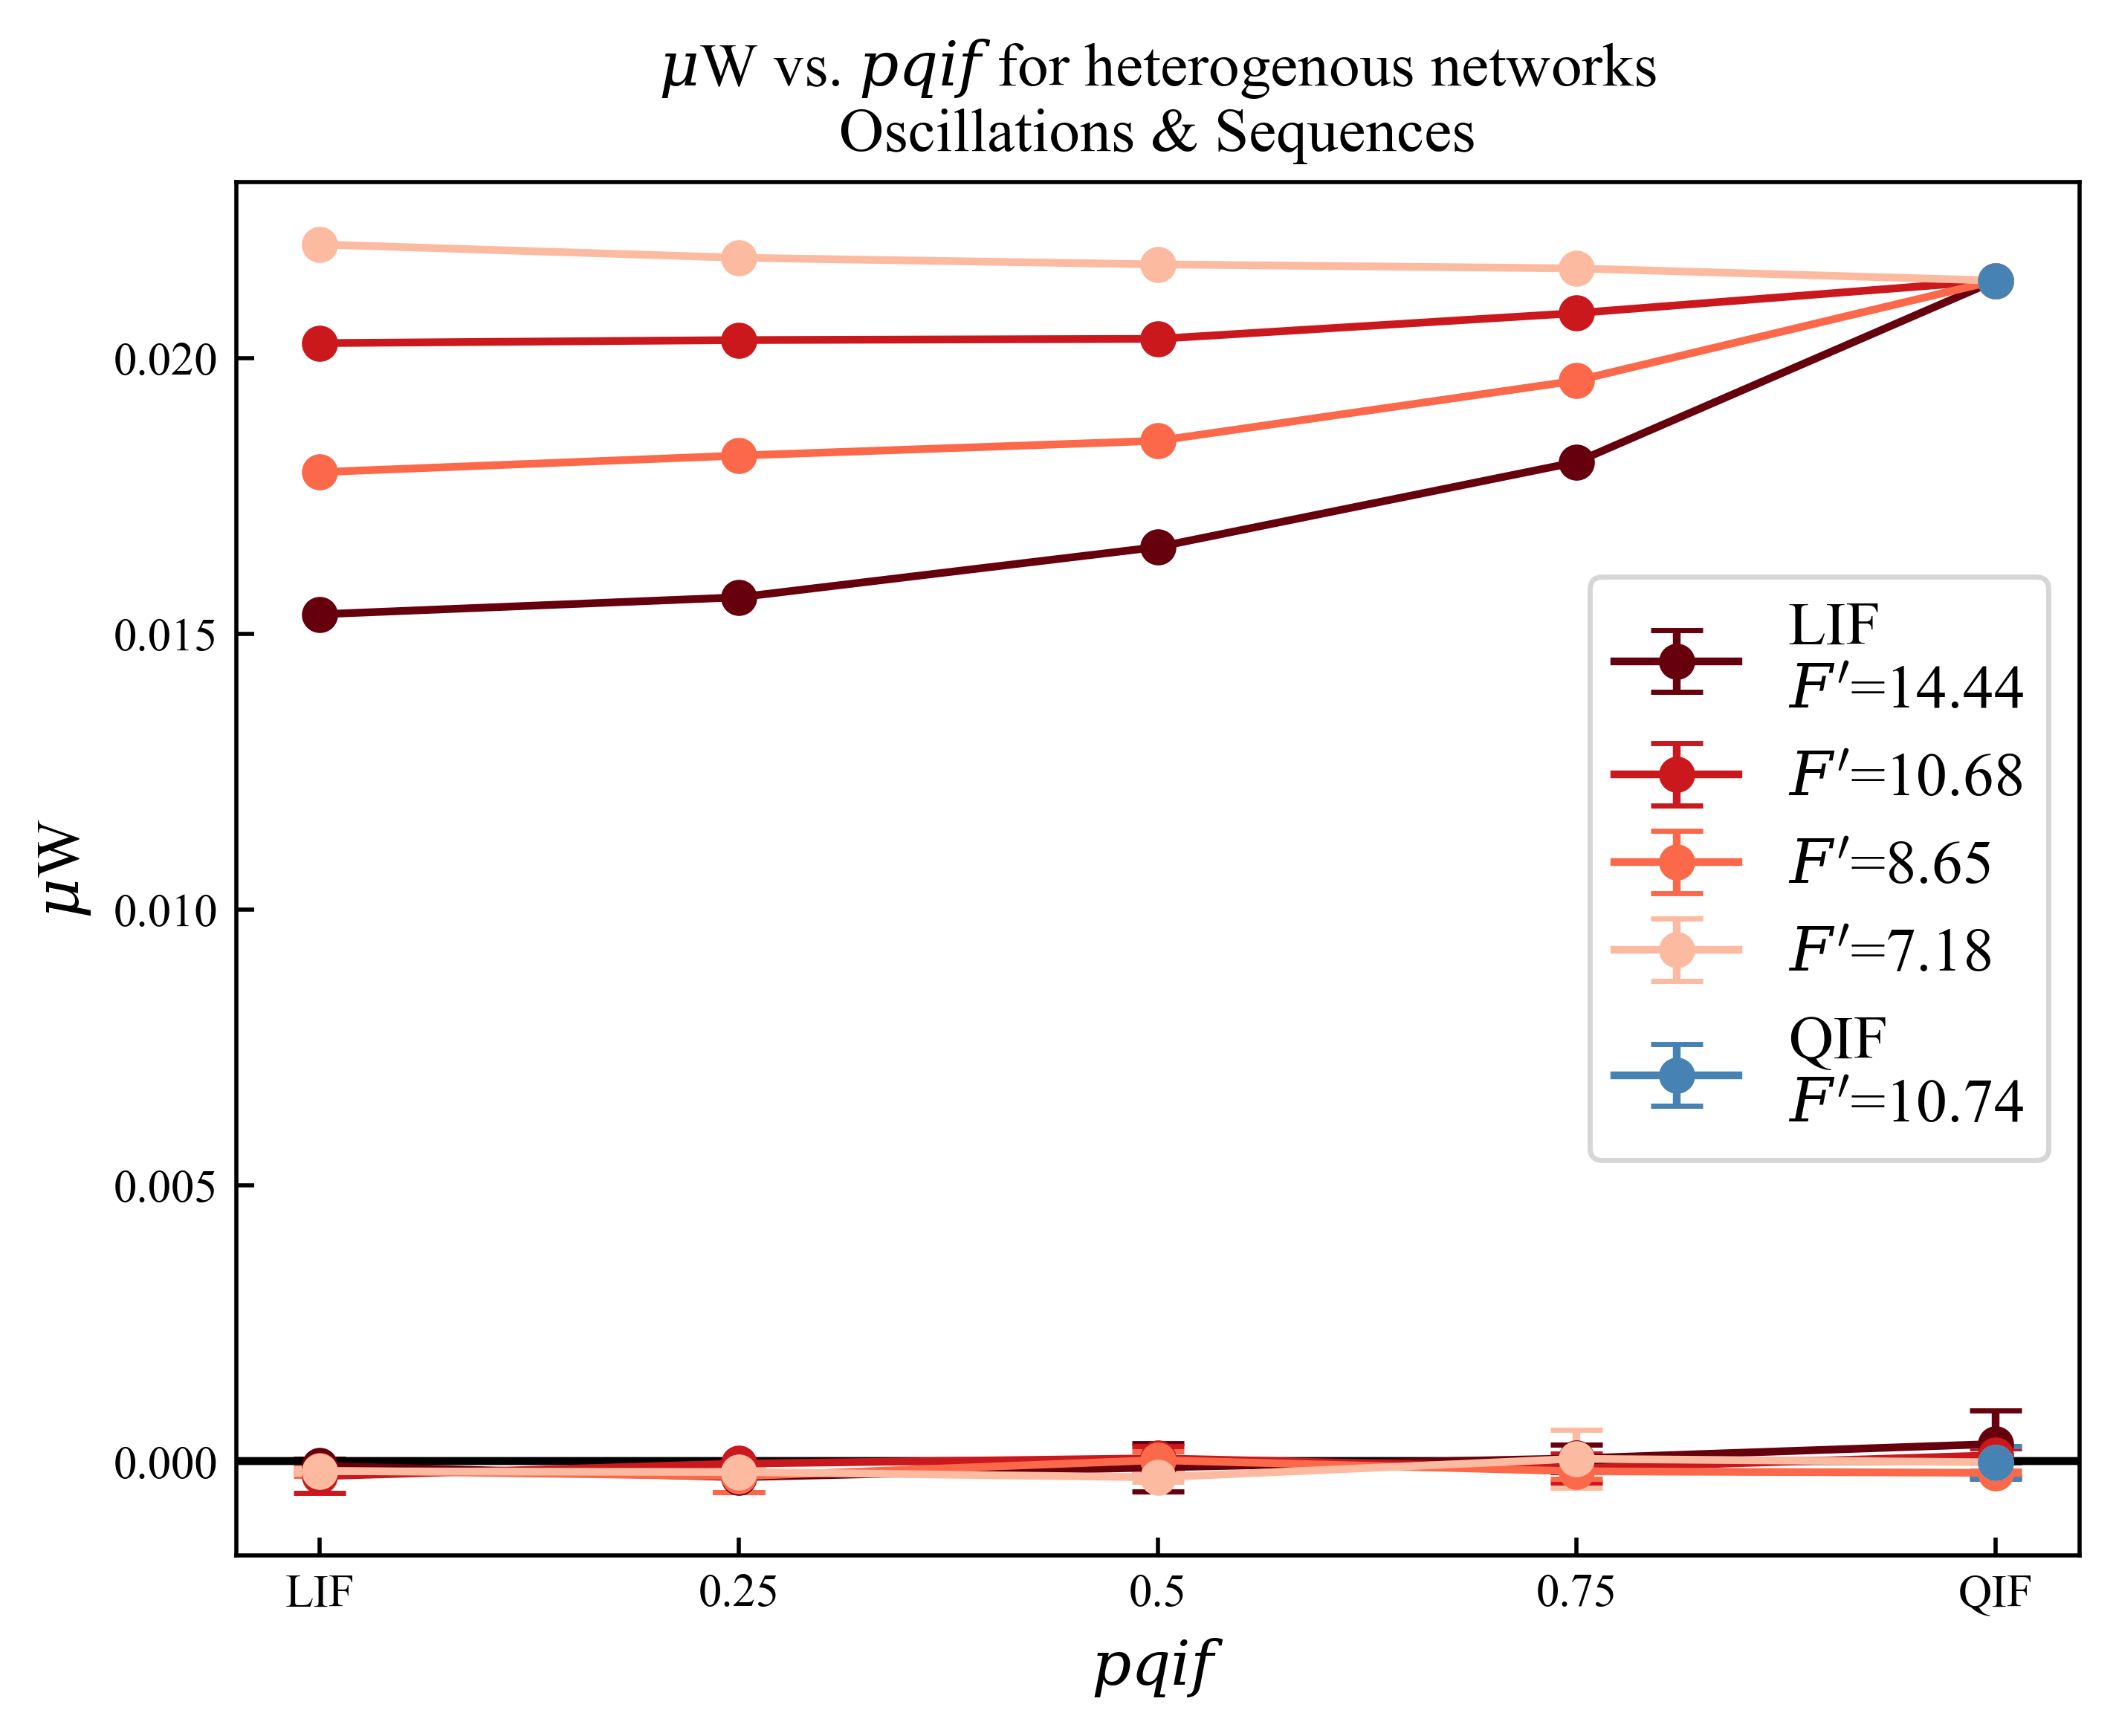

In [20]:
# ========== Mean of weights vs. pqif for heterogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 1)]

columns = ['mean']

x_ticks = ['LIF', 0.25, 0.5, 0.75, 'QIF']

########## Figure loop ##########

fig, ax = plt.subplots()  # Both dynamics should be in the same figure for this one

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    #### Plot same figures for both STD and mean
    for c in columns:



        for sim, vr, f in zip(simulation_number, vrest, slope):

            y = []
            yerr = []
            x = pqif_number

            for pqif in pqif_number:


                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif)]  # Current row of dataframe with metadata. Include all seeds since we want errorbars

                # Y: Mean of Y
                y_i = df_filtered[c].mean()

                # Y-error: STD of Y
                yerr_i = df_filtered[c].std()


                y.append(y_i)
                yerr.append(yerr_i)


            if (sim == simulation_number[0]):
                label = f"LIF\n$F'$={f}"
            else:
                label = f"$F'$={f}"

            if dyn == 'sequences':
                label = None


            ax.errorbar(x, y, yerr, fmt='o-', capsize=5, color=color_map_vrest[vr], label=label)

        
        ########## Title and tick labels ##########
        if c == 'std':
            title = f"$\sigma$W vs. $pqif$ for heterogenous networks\n{dyn.capitalize()}"
            xlabel = f"$pqif$"
            ylabel = f"$\sigma$W"

        elif c == "mean":
            title = f"$\mu$W vs. $pqif$ for heterogenous networks\nOscillations & Sequences"
            xlabel = f"$pqif$"
            ylabel = f"$\mu$W"


        ########## Add QIF ##########
        df_filtered_qif = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == 1)]

        y_qif = df_filtered_qif[c].mean()  # y
        yerr_qif = df_filtered_qif[c].std()  # y-error
        x_qif = 1  # x

        if dyn == 'oscillations': # first
            label = f"QIF\n$F'$={slope_qif}"
        else:
            label = None


        ax.errorbar(x_qif, y_qif, yerr_qif, fmt='o-', capsize=5, color='steelblue', label=label)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xticks(pqif_number, x_ticks)
    ax.set_ylabel(ylabel)
    ax.axhline(0, color='black')


plt.legend()
plt.show()

    
    


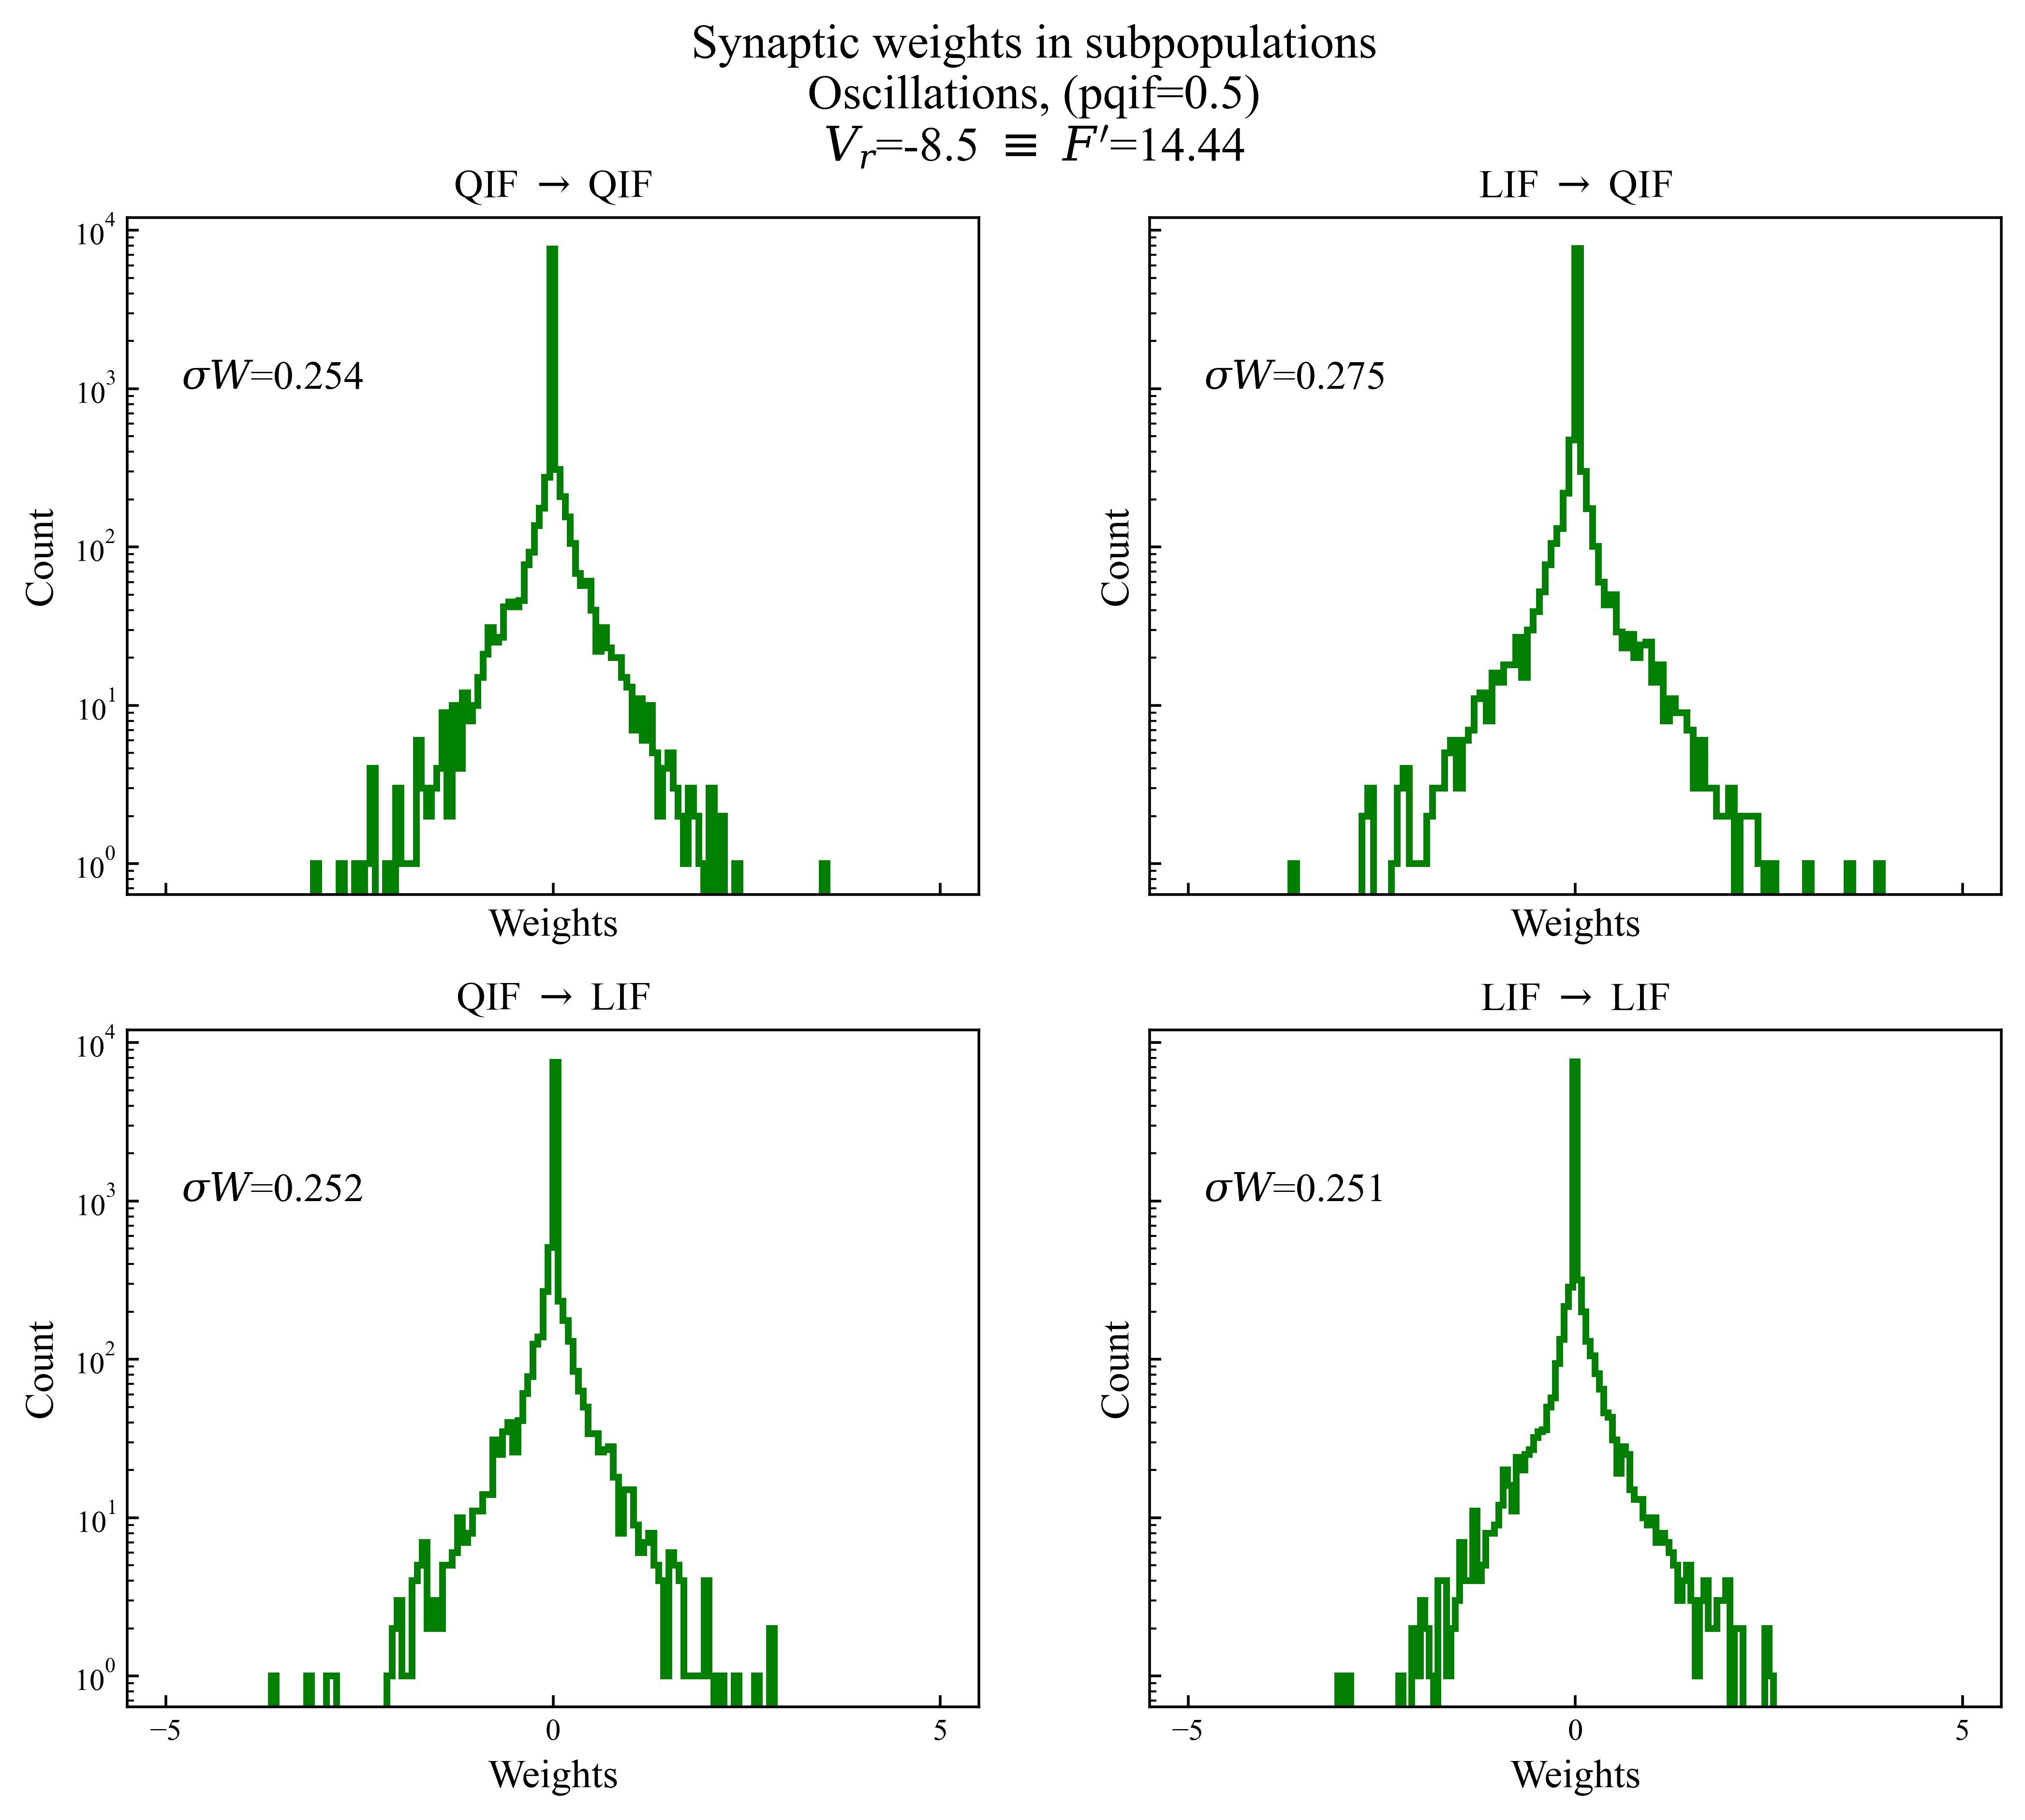

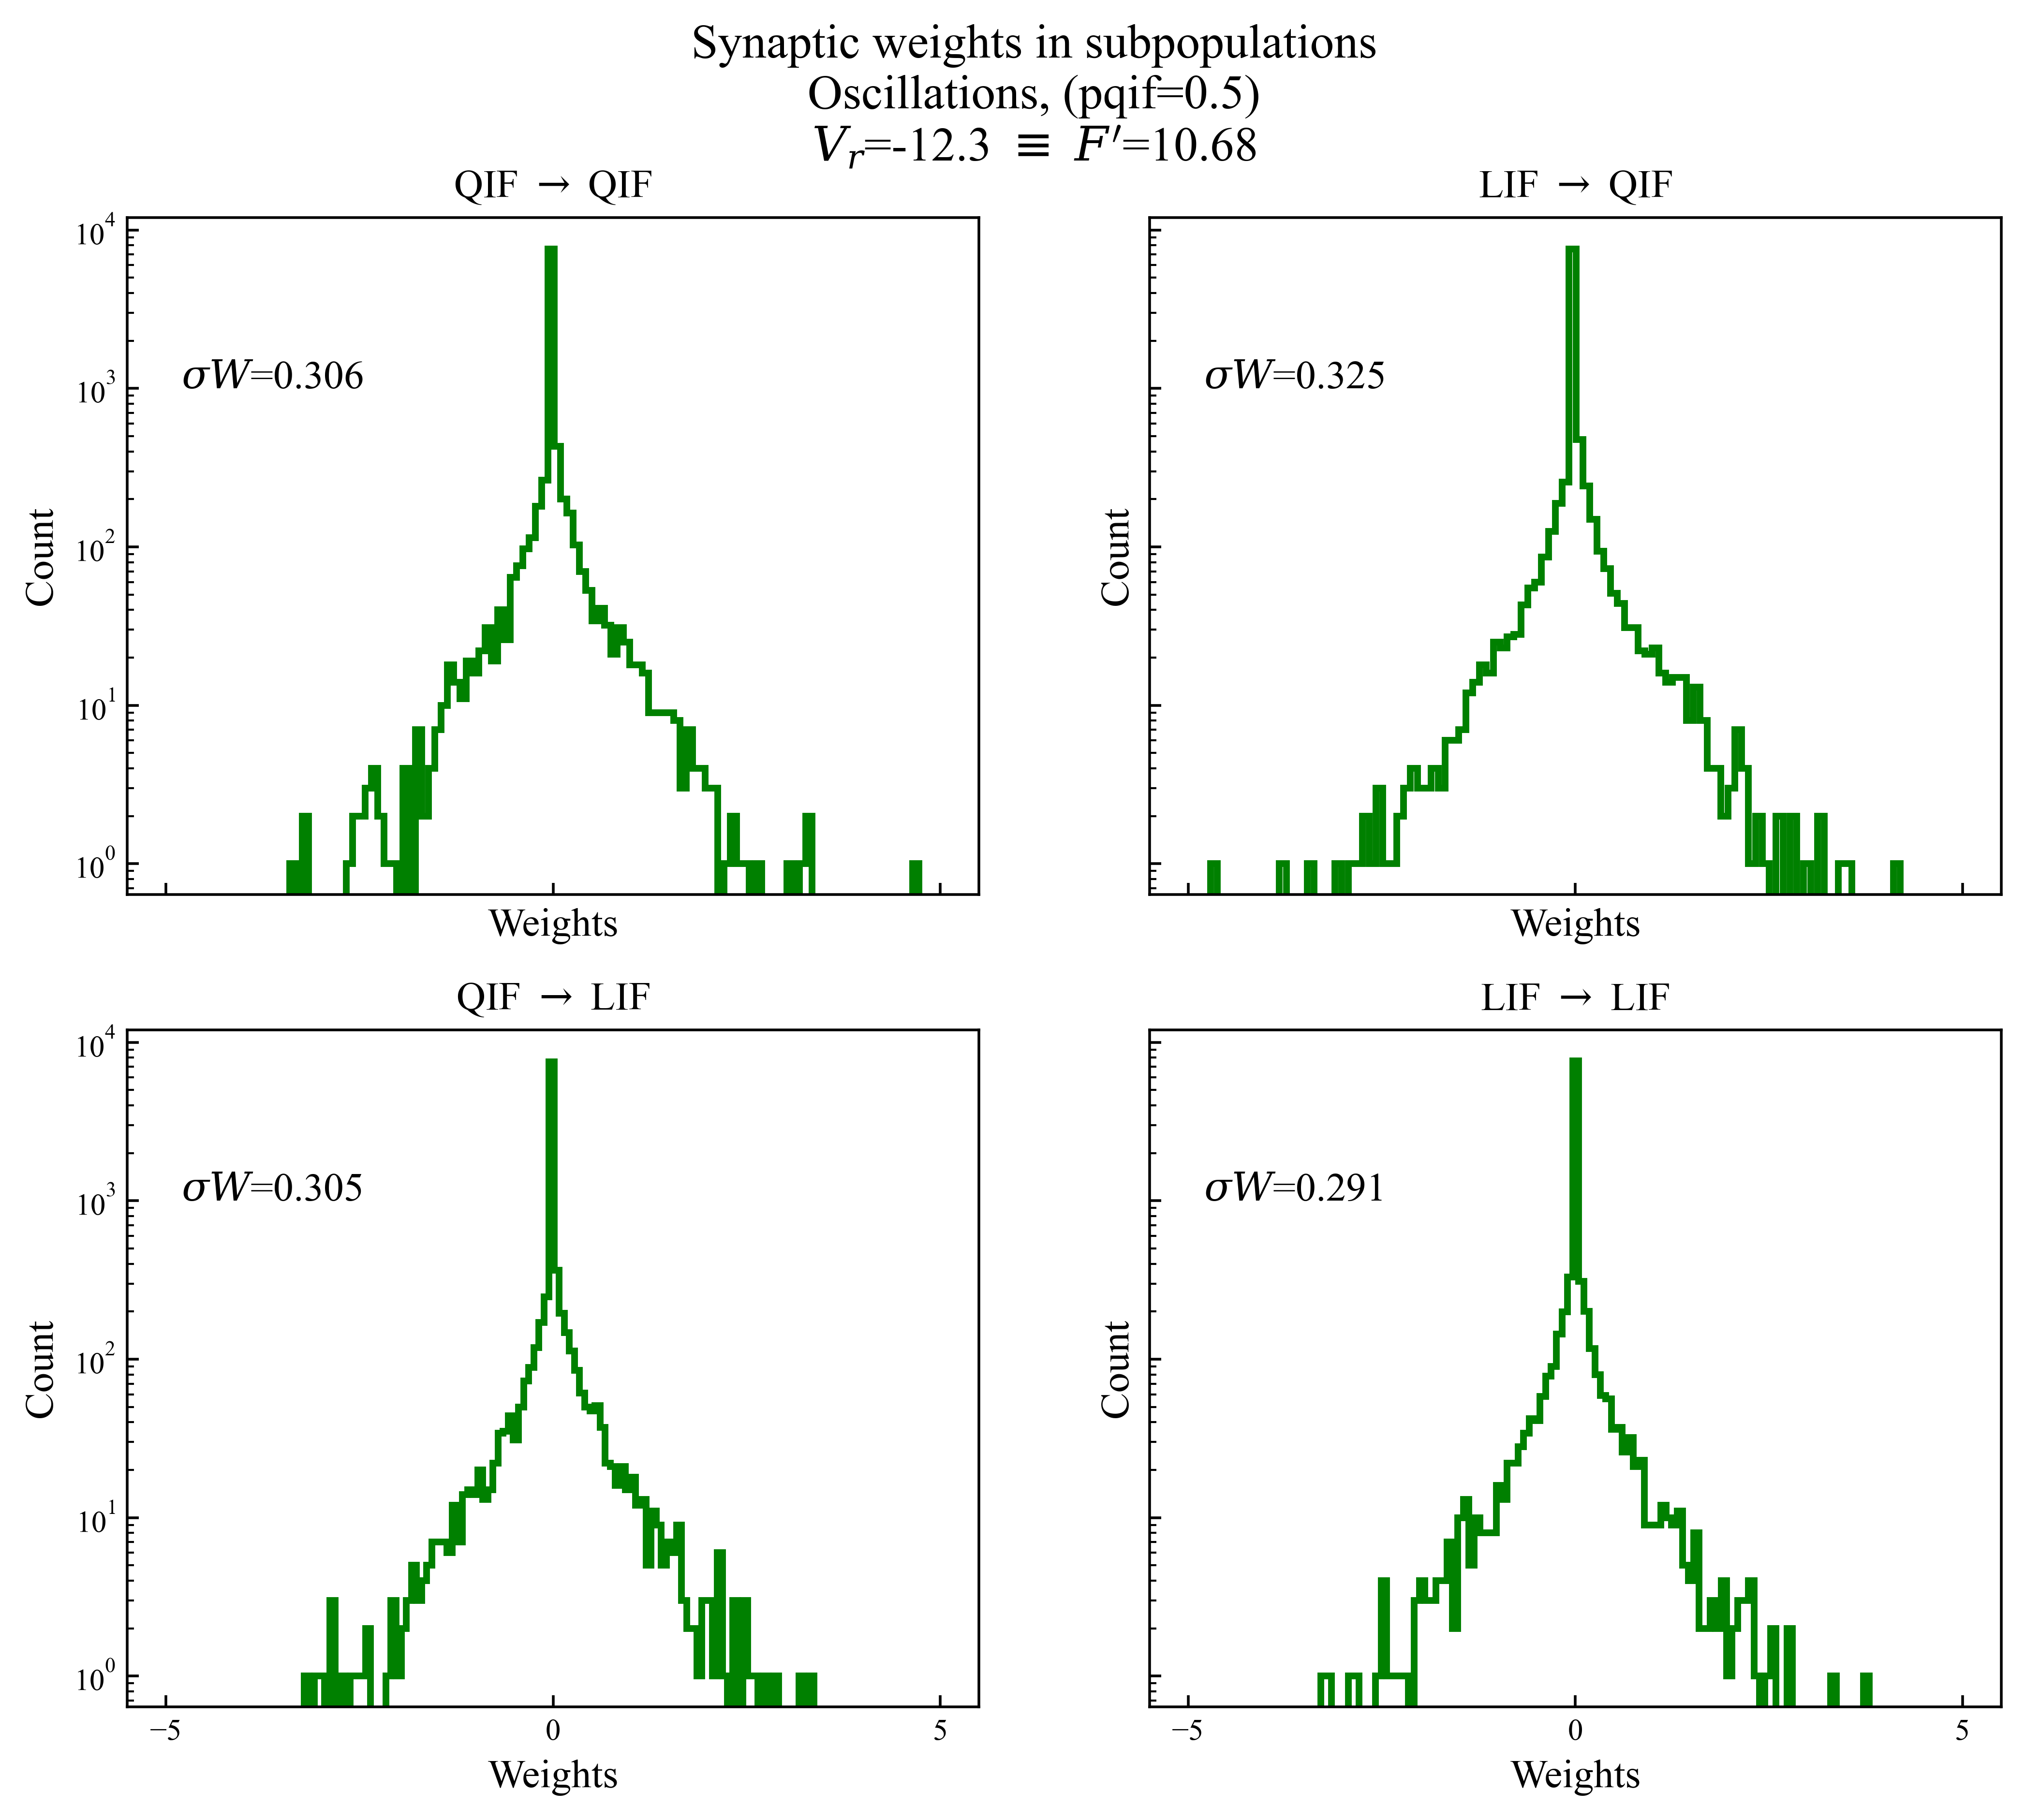

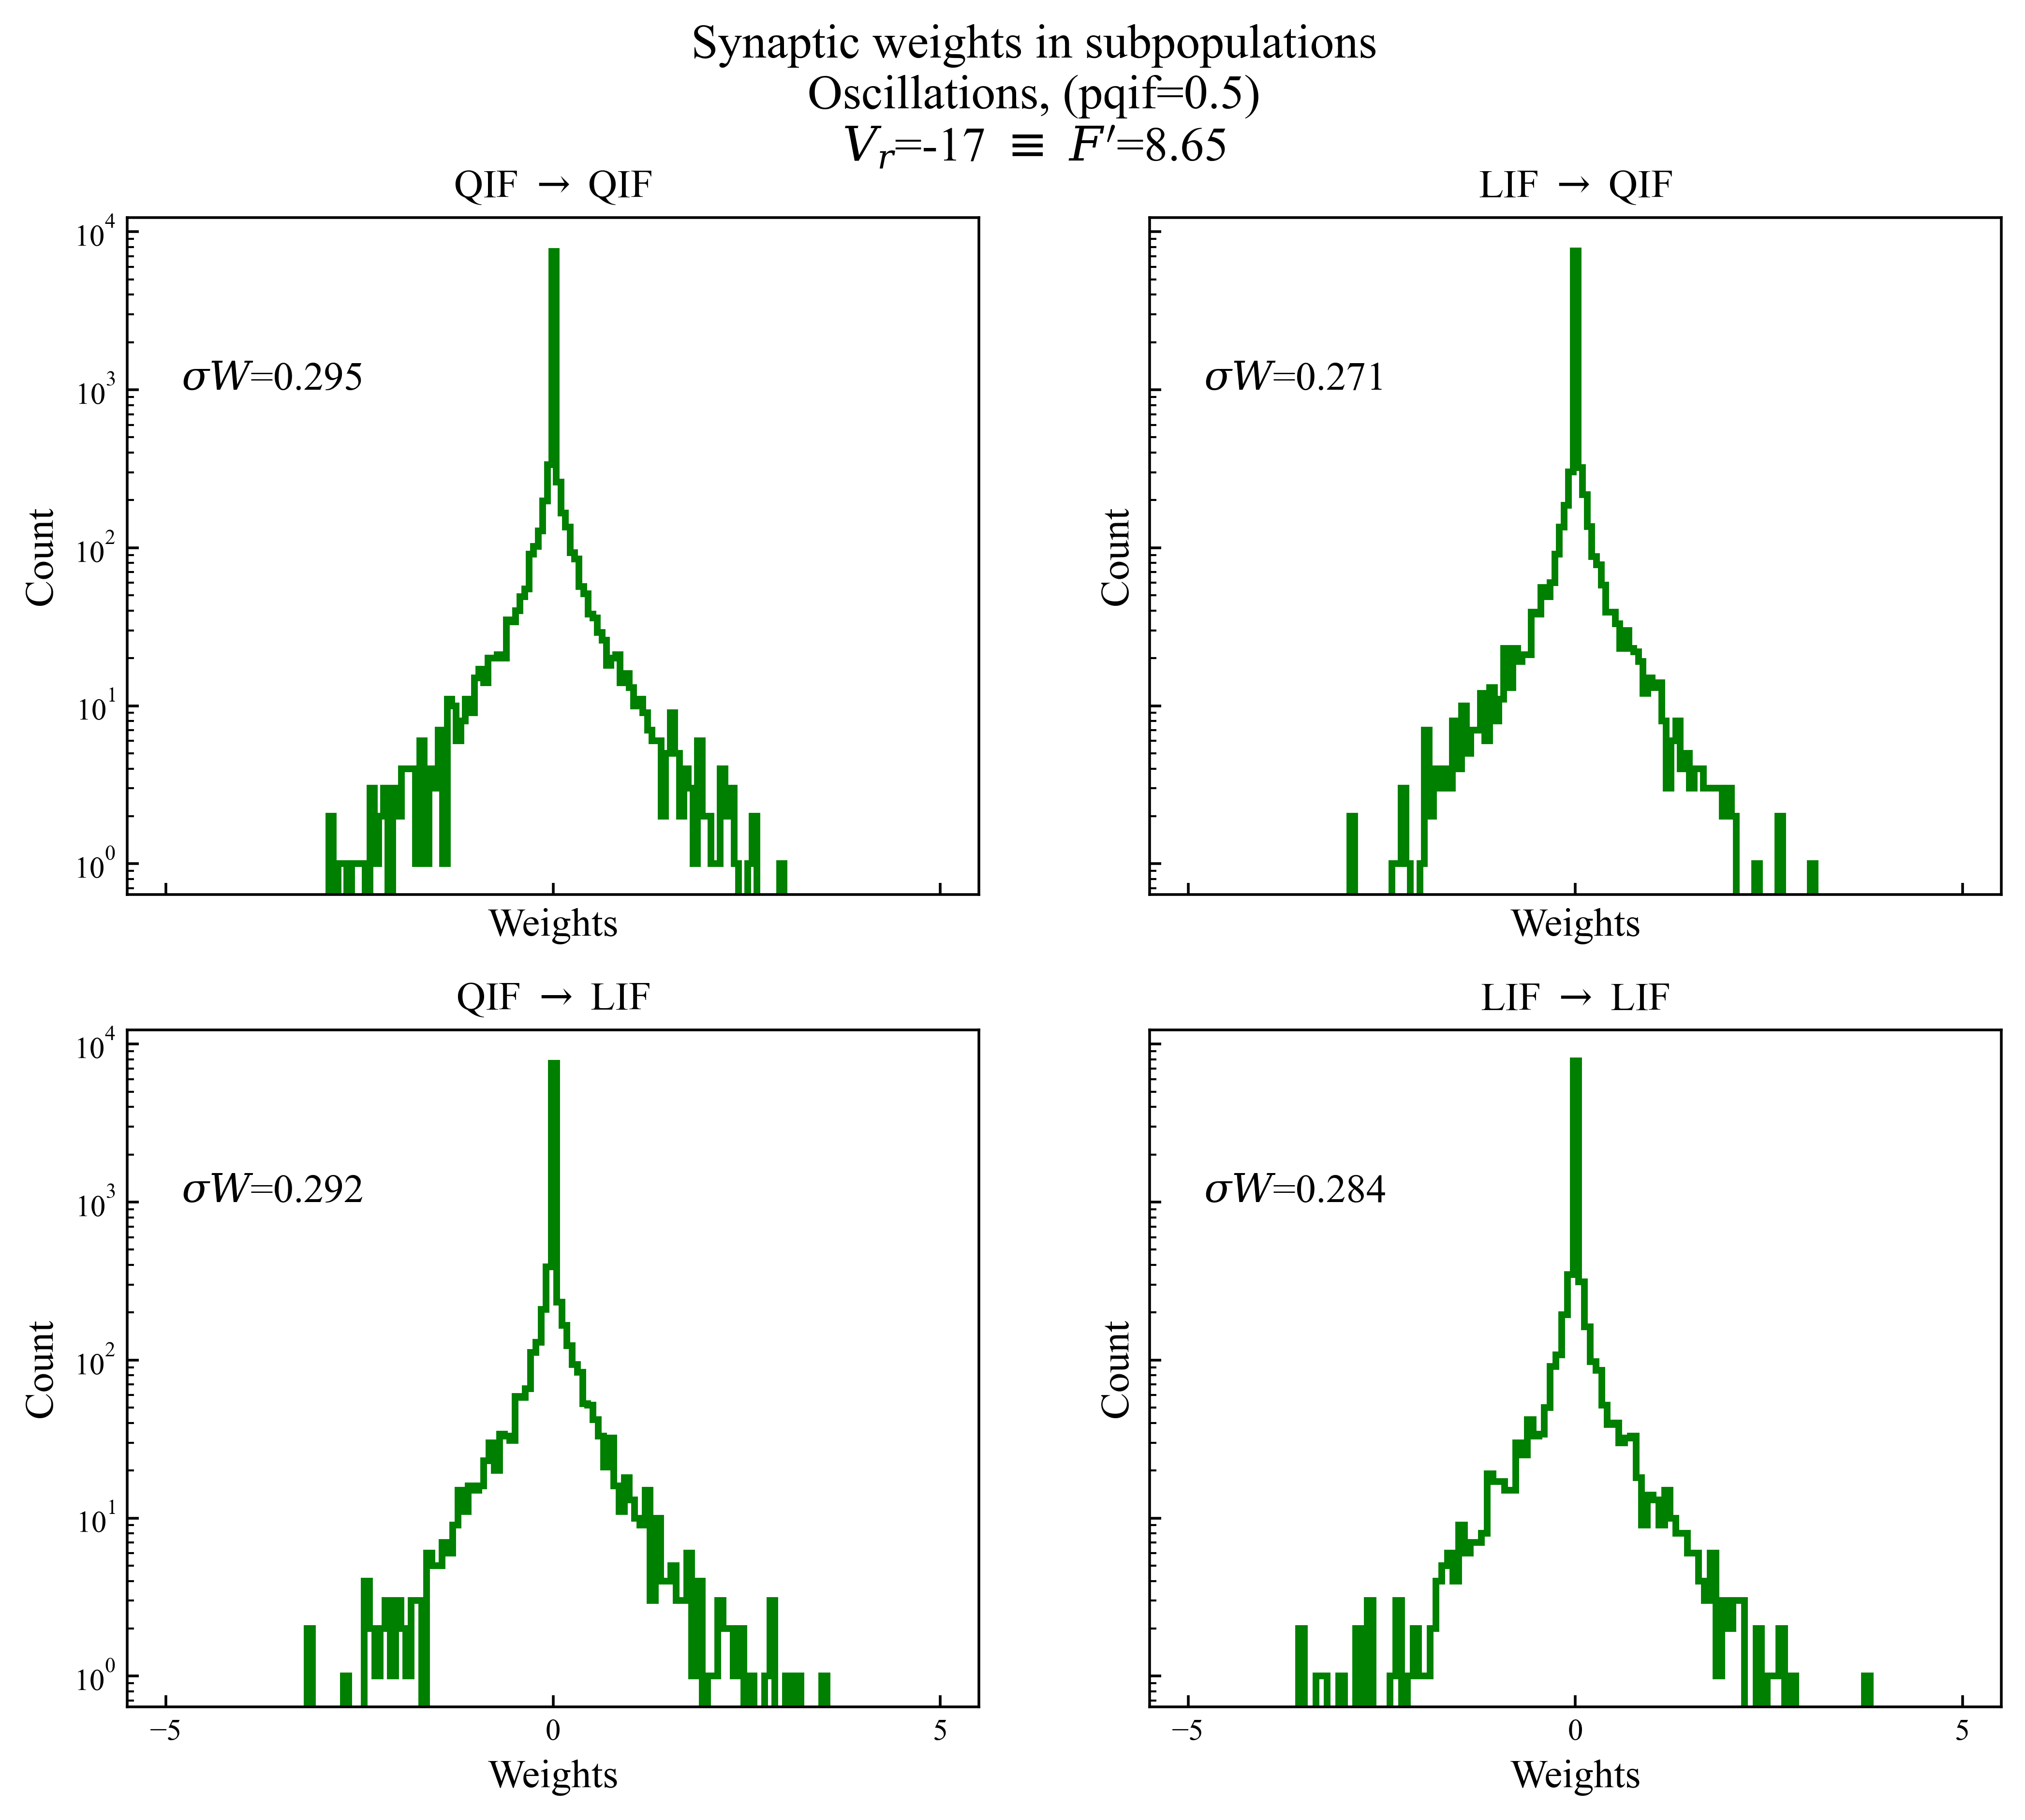

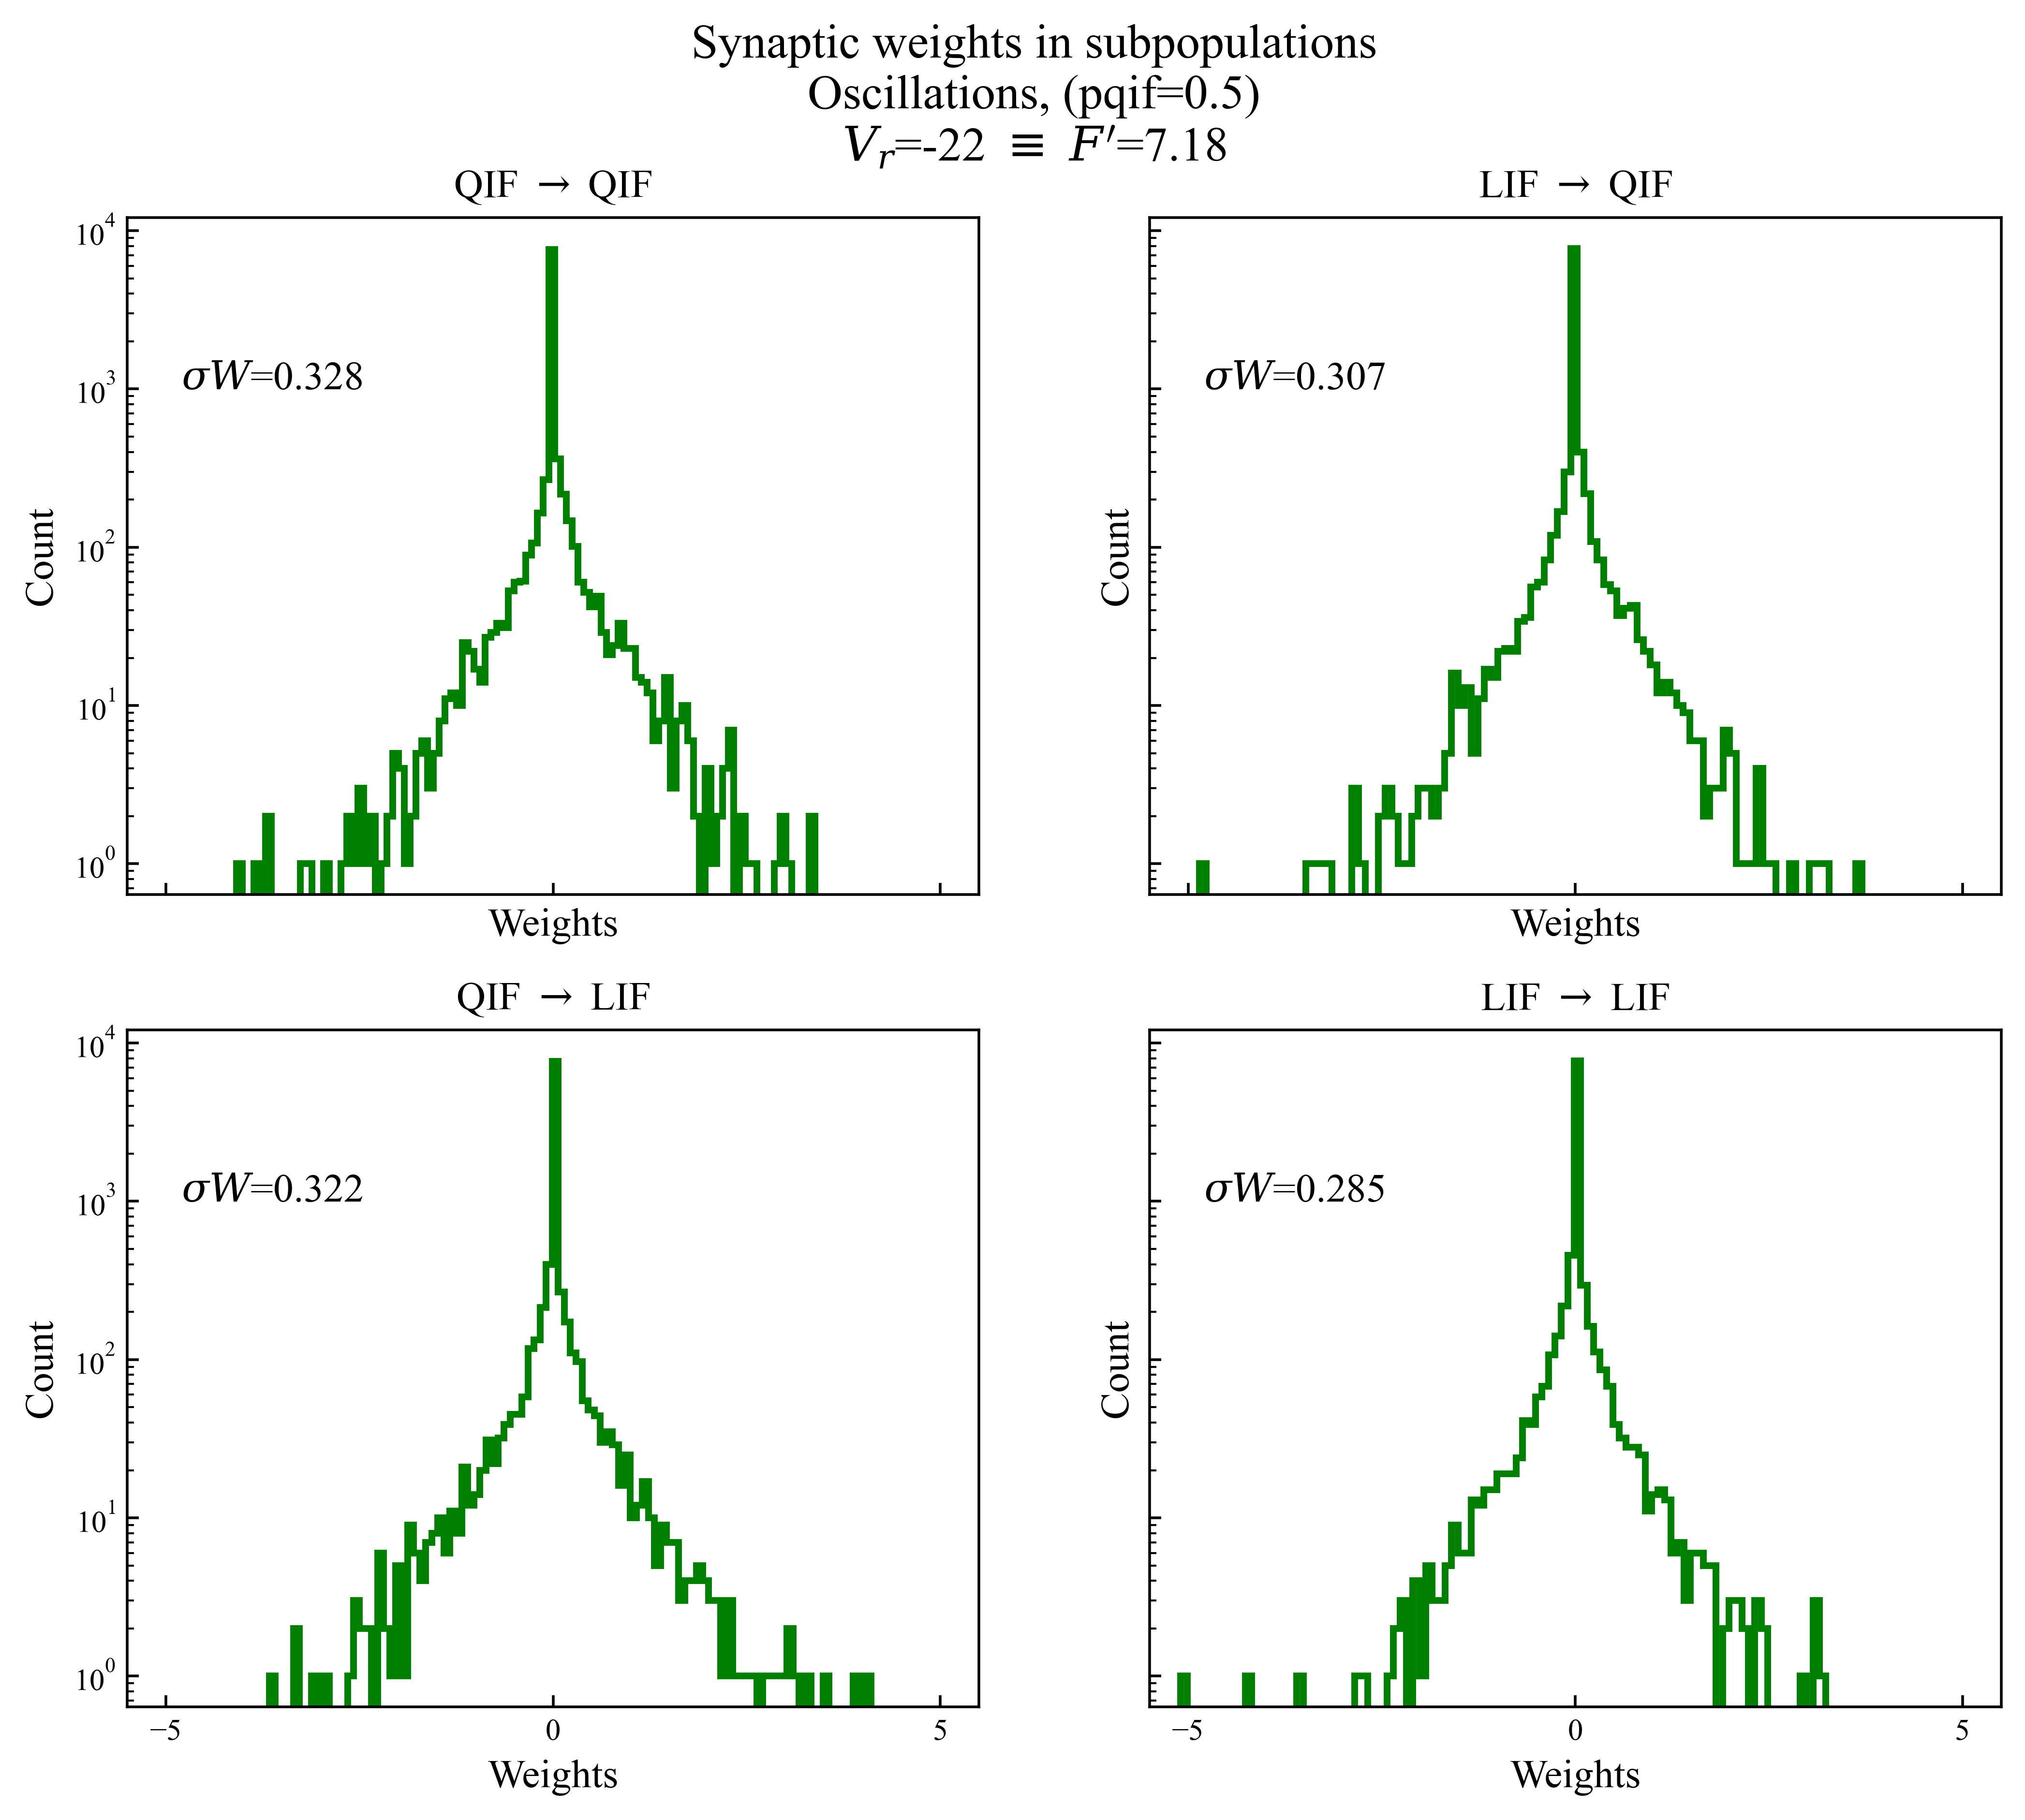

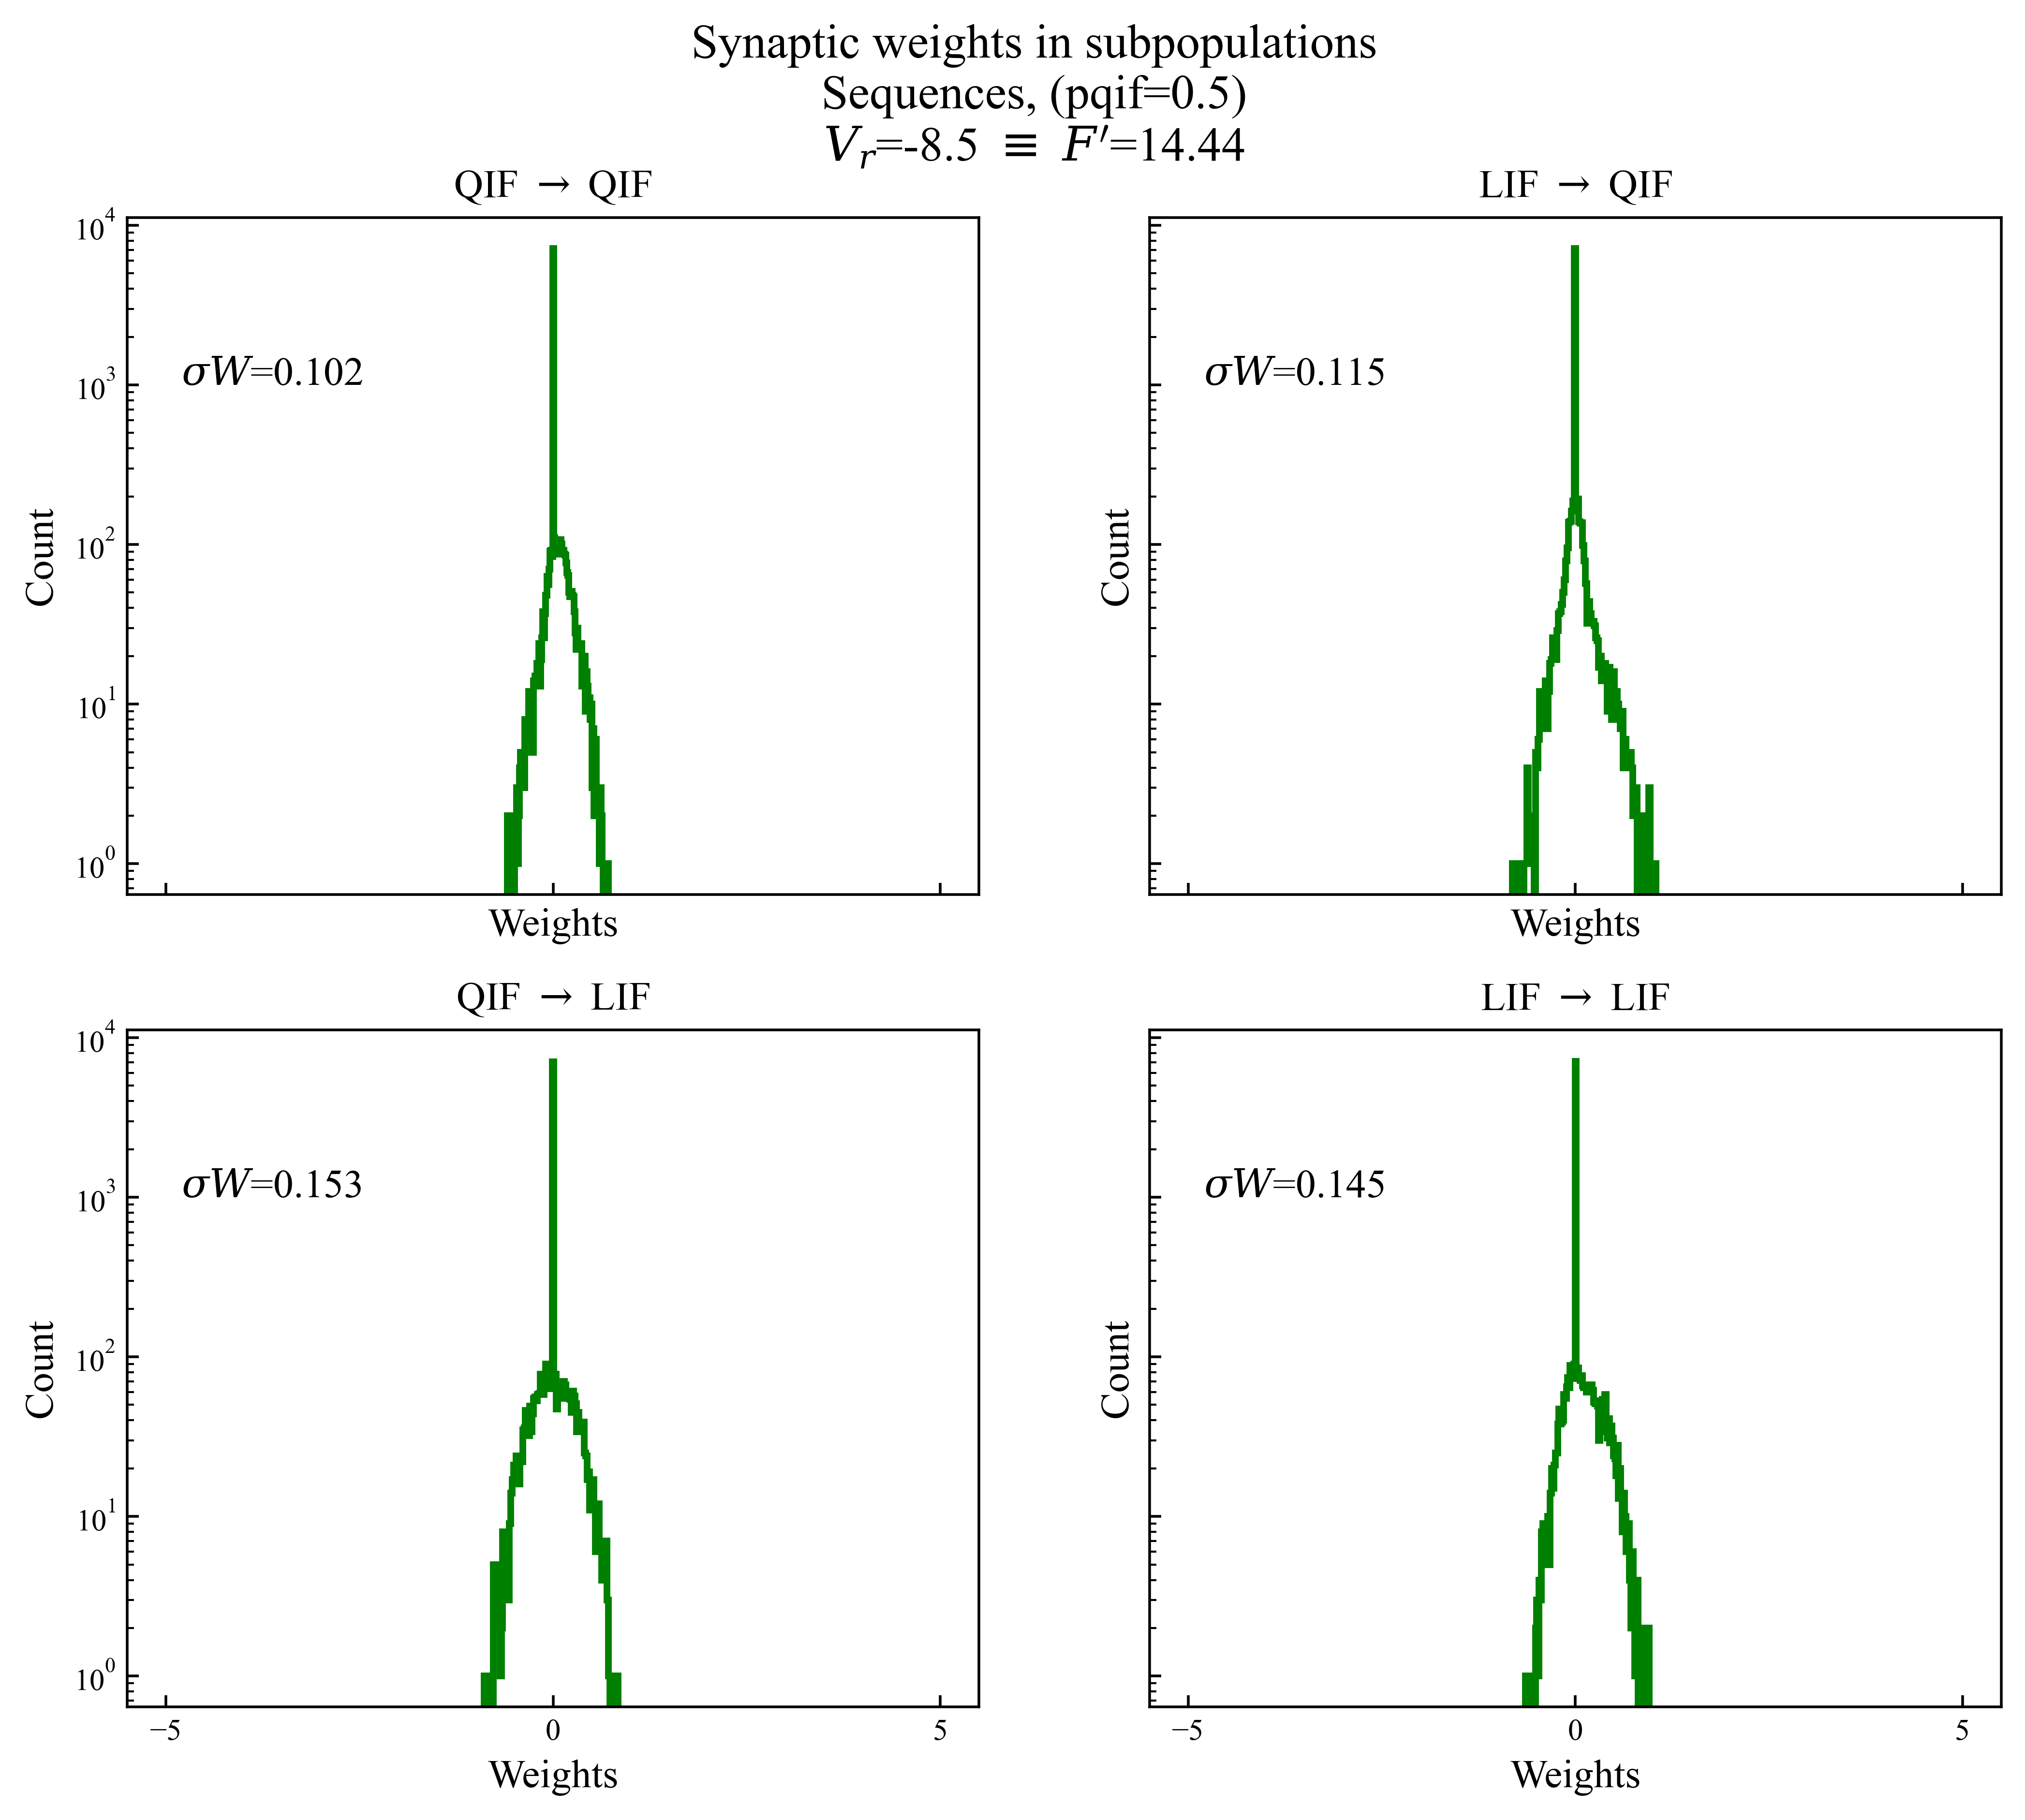

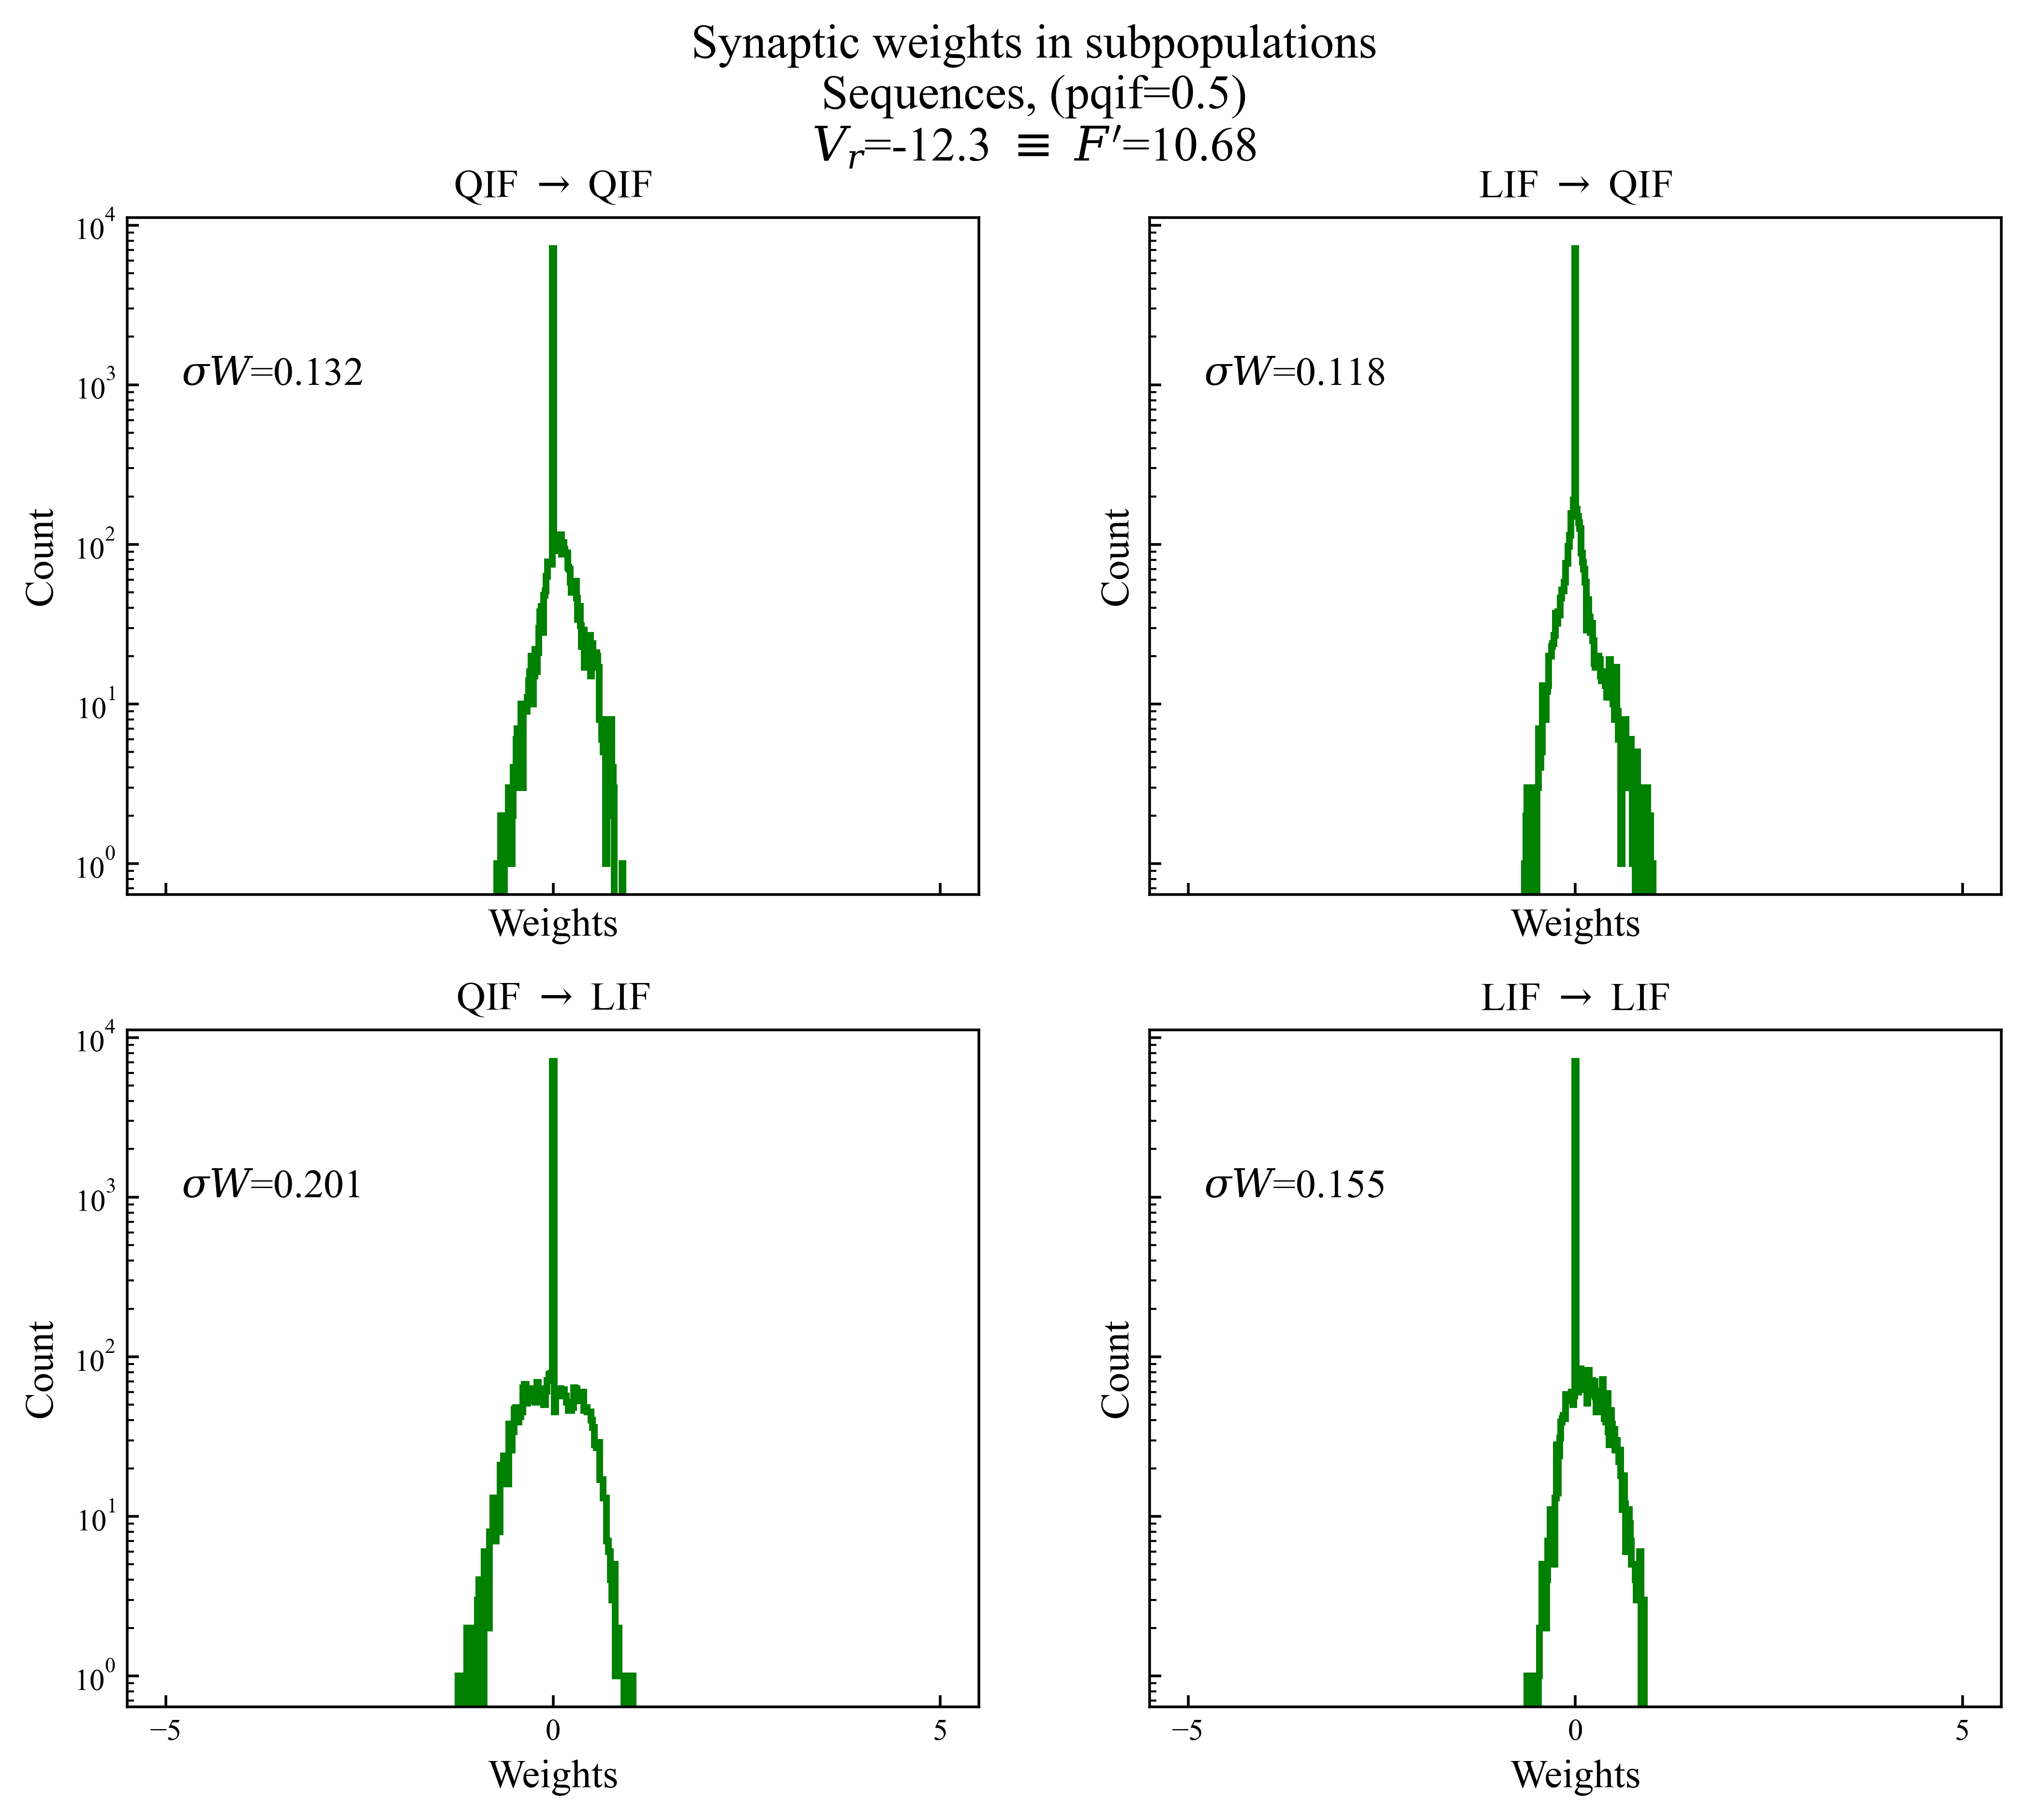

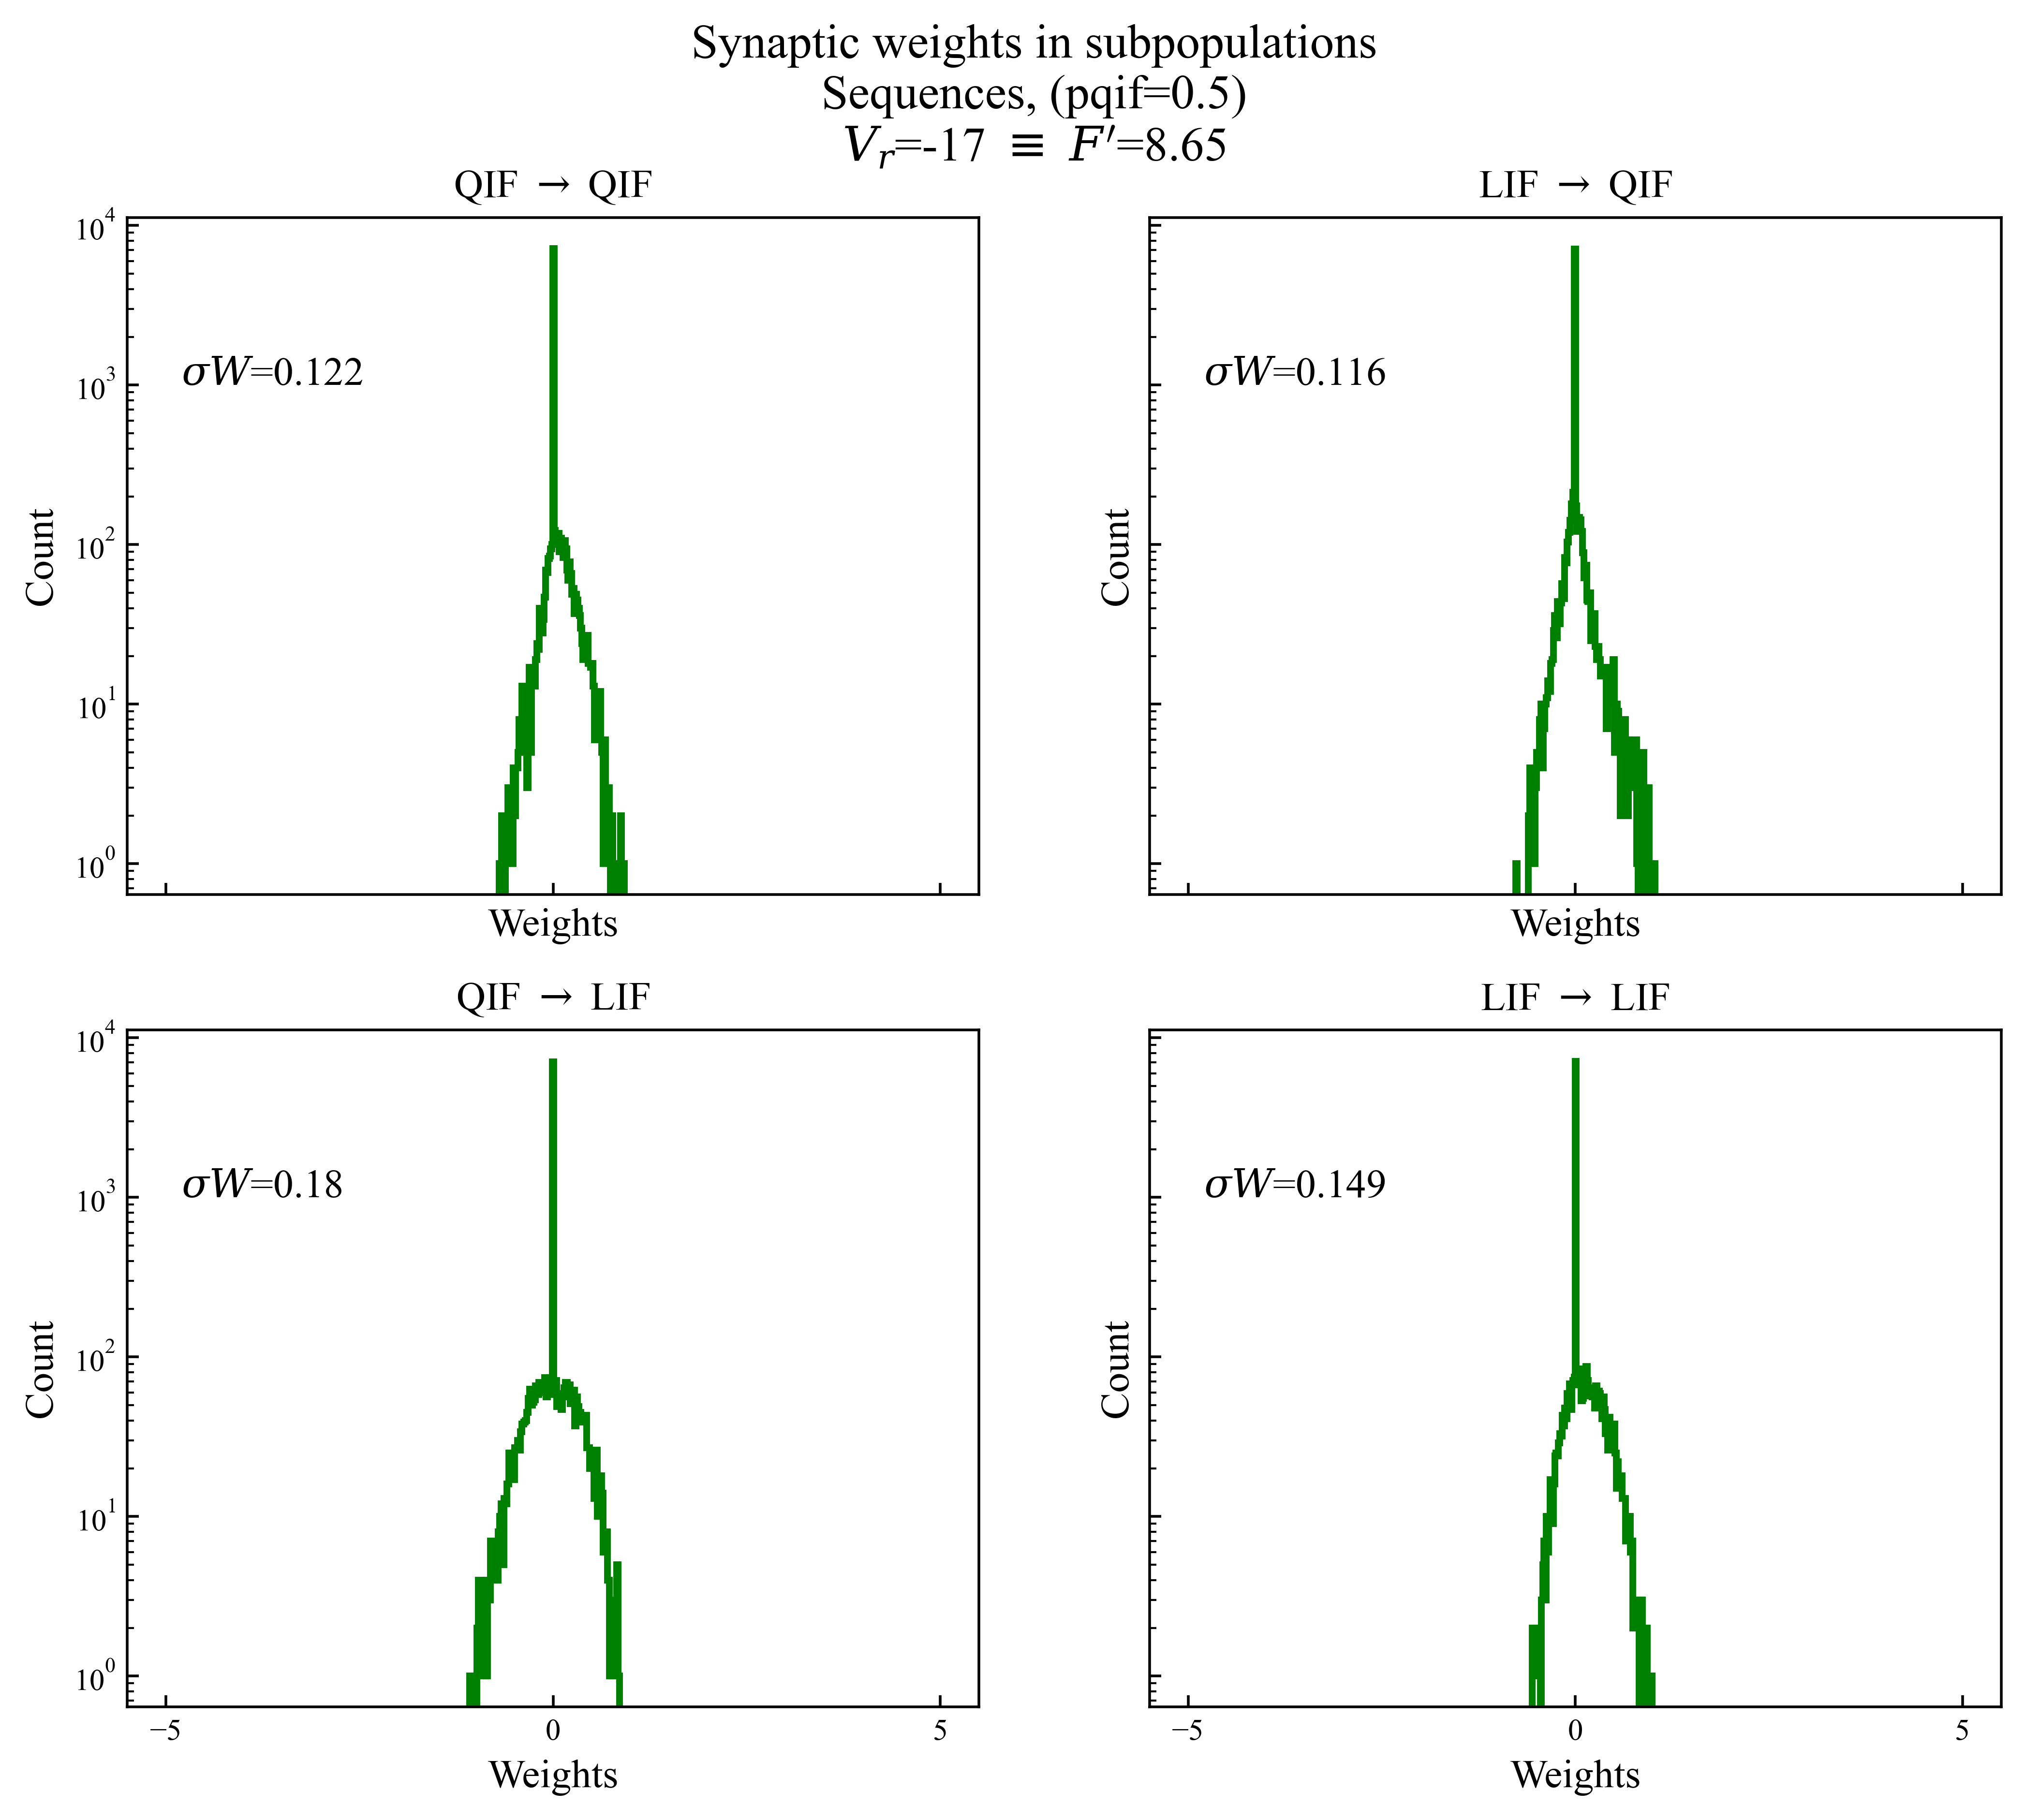

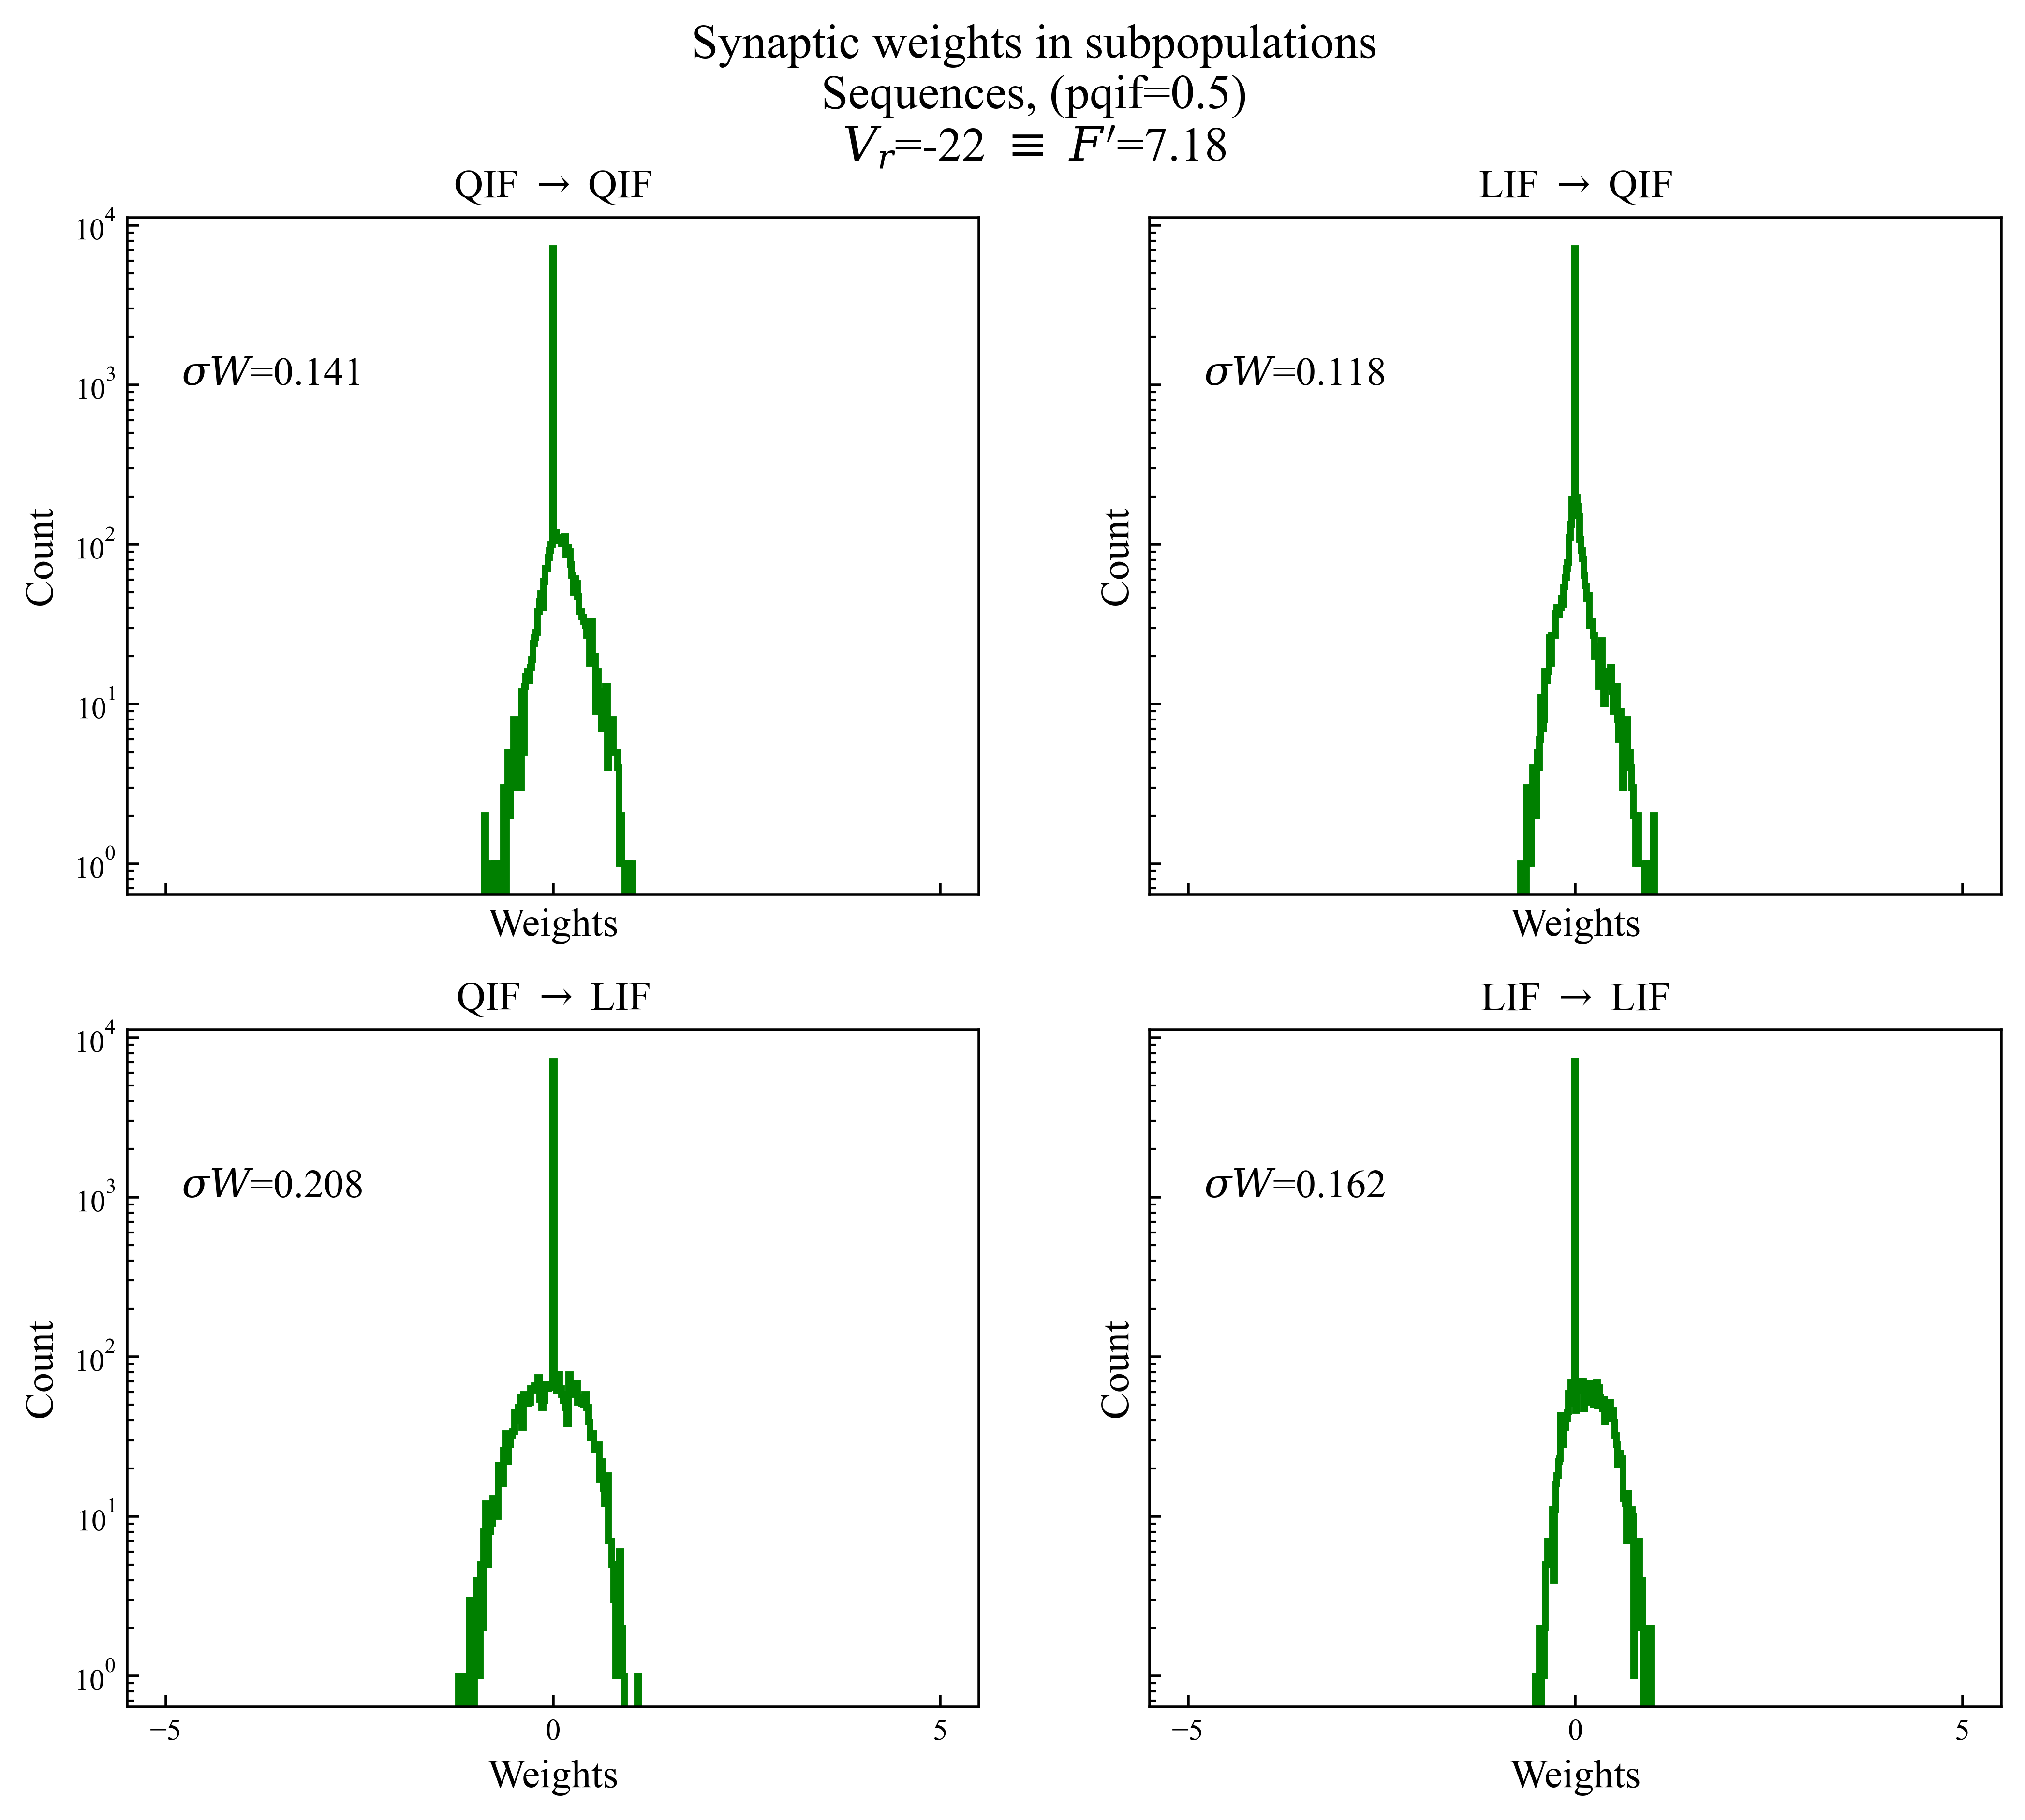

In [34]:
# ========== Breakdown of subpopulations ==========

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

########## Loop variables ##########
# simulation_number = [1, 2, 3, 4]

vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

# pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_number = [0.5]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 1)]

columns = ['mean']

x_ticks = ['LIF', 0.25, 0.5, 0.75, 'QIF']


for dyn in dynamics:

    # Simulation number corresponding to dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for sim, vr, f in zip(simulation_number, vrest, slope):

        fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)  # TODO review

        for pqif in pqif_number:
            for seed in seed_number:
                # Loop through simulations of pqif across seeds

                fig.suptitle(f"Synaptic weights in subpopulations\n{dyn.capitalize()}, (pqif={pqif})\n$V_r$={vr} $\equiv$ $F'$={f}")

                dataframe_title = f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}' # load dataframe

                simulation_id = f'{dyn}_{sim}_{pqif}_{seed}'  # Shared across dataframe and dictionary

                try:  # Notify if something did not exist
                    weights_df = pd.read_csv(dataframe_title, header=None)
                except FileNotFoundError:
                    print(f"File not found: {dataframe_title}, will be skipped.")
                    continue  # Go to next iteration

                r, c = weights_df.shape  # rows, columns

                
                if r % 2 != 0 or c % 2 != 0:  # check if even
                    sys.exit(f"Error: Matrix has odd dimensions ({r} x {c}), cannot split evenly.")

                r_mid = r // 2  # Find middle of rows
                c_mid = c // 2  # Find middle of columns

                q1 = weights_df.iloc[:r_mid, :c_mid].copy()  # qif-->qif
                q2 = weights_df.iloc[:r_mid, c_mid:].copy()  # lif-->qif
                q3 = weights_df.iloc[r_mid:, :c_mid].copy()  # qif-->lif
                q4 = weights_df.iloc[r_mid:, c_mid:].copy()  # lif --> lif

                list_of_quadrants = [q1, q2, q3, q4]

                list_of_titles = [(rf"QIF $\rightarrow$ QIF"), (rf"LIF $\rightarrow$ QIF"), (rf"QIF $\rightarrow$ LIF"), (rf"LIF $\rightarrow$ LIF")]

        axs_flat = axs.flat

        for i, (q, title) in enumerate(zip(list_of_quadrants, list_of_titles)):
            ax = axs_flat[i]
            # ax = axs
            data = q.values.flatten()  # take out values and flatten into 1D

            sd = np.std(data)
            sd_rounded = np.round(sd, decimals=3)

            ticks = [-5, 0, 5]

            ax.hist(data, bins=100, log=True, histtype='step', linewidth=2, color='green')
            ax.set_title(title)
            ax.text(-4.8, 10**3, f"$\sigma$$W$={sd_rounded}")
            ax.set_xlabel('Weights')
            ax.set_xlim(-5.5, 5.5)
            ax.set_xticks(ticks)
            ax.set_ylabel('Count')
        plt.show()



In [95]:
import matplotlib
print(matplotlib.__version__)

3.10.5
